# Analysis of paleomagnetic data from the Nonesuch Formation

This Jupyter notebook analyzes and visualizes the results of thermal demagnetization data developed in the UC Berkeley paleomagnetism lab for paleomagnetic samples collected from the Nonesuch Formation. These data are associated with the paper:

> Slotznick, S.P., Swanson-Hysell, N.L., Zhang, Y.,  Clayton, K., Wellman, C.H., Tosca, N.J., and Strother, P.K., Reconstructing the paleoenvironment of an oxygenated Mesoproterozoic shoreline and its record of life, *in revision at GSA Bulletin*.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

## Load Potato River Falls location thermal demagnetization data

In this study, each `specimen` is a unique stratigraphic horizon within the section. Therefore each `specimen` is a `site` within the MagIC data model given that a `site` corresponds to a unit with common age and magnetization.

The locations table contains the directional Fisher means of the underlying sites/specimens.

The code cell below imports the `locations.txt` table, the `samples.txt` table, and the `specimens.txt` table associated with the MagIC contribution.

In [2]:
data_directory = 'study_data/'

location = pd.read_csv(data_directory + 'locations.txt', sep='\t', header=1)
sites = pd.read_csv(data_directory + 'sites.txt', sep='\t', header=1)
samples = pd.read_csv(data_directory + 'samples.txt', sep='\t', header=1)
specimens = pd.read_csv(data_directory + 'specimens.txt', sep='\t', header=1)

In [3]:
location.head(1)

location                                            samples  \
0  Potato River Falls  PF18-1:PF18-160:PF18-161:PF18-162:PF18-163:PF1...   

                                               sites  \
0  PF18-1:PF18-160:PF18-161:PF18-162:PF18-163:PF1...   

                                           specimens   age  age_high  age_low  \
0  PF18-1a:PF18-160a:PF18-161a:PF18-162a:PF18-163...  1075    1085.6     1050   

   age_sigma age_unit  dir_alpha95  dir_dec  dir_inc  dir_k  dir_n_samples  \
0        NaN       Ma          4.3     70.0    -50.1     87             14   

   dir_n_sites  dir_n_specimens    dir_r  dir_tilt_correction      lat_n  \
0           14               14  13.8513                    0  46.461822   

       lat_s      lon_e      lon_w  analysts  \
0  46.461285 -90.529536 -90.530067       NaN   

                  software_packages  pole_alpha95 result_name  pole_dm  \
0  pmagpy-4.2.24-1: demag_gui.v.3.0           NaN     hct:All      NaN   

   pole_dp  pole_k  pole_lat  pole_lon  pole_r   citations method_codes  \
0      NaN     NaN       NaN       NaN     NaN  This study        DE-FM   

           result_name.1          location_type geologic_classes lithologies  
0  Nonesuch hematite CRM  Stratigraphic Section      Sedimentary   Siltstone

In [4]:
samples.head(1)

analysts  azimuth  azimuth_dec_correction  bed_dip  bed_dip_direction  \
0       NaN     33.6                     0.0     81.4              311.5   

    citations   dip  geologic_classes  geologic_types  height  lithologies  \
0  This study -29.0               NaN             NaN   105.9          NaN   

   method_codes  sample    site  
0  SO-CMD-NORTH  PF18-1  PF18-1

In [5]:
specimens.head(1)

analysts   citations  dir_alpha95 dir_comp  dir_dang  dir_dec  dir_inc  \
0       NaN  This study          NaN       mt      11.8    271.1      7.1   

   dir_mad_free  dir_n_comps  dir_n_measurements  dir_tilt_correction  \
0           2.1          1.0                 5.0                100.0   

               instrument_codes int_corr            location  meas_step_max  \
0  hargrave 2021-06-08 10:17:21        u  Potato River Falls          863.0   

   meas_step_min meas_step_unit                 method_codes result_quality  \
0          823.0              K  LP-DIR-T:DE-BFL:DA-DIR-TILT              g   

     sample      site           software_packages   specimen  
0  PF18-100  PF18-100  pmagpy-4.2.24-1: demag_gui  PF18-100a

## Summary of the components

A total of four components were identified within the samples that are named as follows within `specimens.txt`:
- an `lt` component: low temperature component (the direction of the component corresponds to the present day local field direction in geographic coordinates)
- an `mt` component: magnetite temperature component, typically fit in a small unblocking temperature window between 500º and 580ºC (interpreted to be the remanence carried by detrital magnetite)
- a `hdt` component: hematite detrital remanence component, typically fit in a small range of unblocking temperature steps from 660º to 680ºC (as can be seen in that analysis below, it has a similar direction to the `mt` component)
- a `hct` component: hematite chemical remanence component, typically fit over a wide range of unblocking temperature steps from 300 to 660ºC (this component has a distinct direction than the mt and hdt components)
- a `mht` component: mid to high temperature remanence component, typically fit over a wide range of unblocking temperature steps from 300 to 620ºC (this component has the same direction as the `hct` component); in contrast to the `mt`, `hdt`, and `hct` components which are within siltstone and very fine 

This notebook summarizes these data and generates the components of this figure that visualizes them:

<img src="./images/pmag_figure.png">

*Thermal demagnetization paleomagnetic data for a specimen from Facies 3 (PF18-75a) and a specimen from Facies 2 (PF18-76a) shown as vector component plots, magnetic moment plots, and equal area plots. The Facies 3 data have a well-resolved high unblocking-temperature component (consistent with being held by detrital hematite) and a component that progressively unblocks up to $\sim$660\textdegree C (consistent with being held by pigmentary hematite) that is in a distinct direction. The Facies 2 data reveal components held by magnetite and high unblocking temperature hematite that give similar directions --- consistent with being primary detrital remanent magnetization held by the two different magnetic minerals. Directions for siltstone to very fine-sandstone specimens analyzed and fit with the different components are shown in the bottom panel of equal area plots. The low-temperature overprint has a similar direction to that of the present local field. The detrital magnetite and detrital hematite directions are both west and shallowly down. The pigmentary hematite direction has a similar, but distinct, direction from the detrital remanence directions. NRM = natural remanent magnetization.*

## Split the location and specimens data into individual components

Directional means associated with the components were calculated when the MagIC files were developed within Pmag_GUI. We can import these data from the location table.

Within the locations table, there are means associated with both geographic coordinates where the tilt correction is zero (i.e. `location['dir_tilt_correction'] == 0` and where the data have been tilt-corrected (i.e. `location['dir_tilt_correction'] == 100`). 

For the specimen directions and the location means, we split out the `lt` component mean result in geographic coordinates and the rest in tilt-corrected coordinates.

In [6]:
location_lt = location[(location['result_name'] == 'lt:All') & (location['dir_tilt_correction'] == 0)]
location_mt = location[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100)]
location_hct = location[(location['result_name'] == 'hct:All') & (location['dir_tilt_correction'] == 100)]
location_hdt = location[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100)]
location_mht = location[(location['result_name'] == 'mht:All') & (location['dir_tilt_correction'] == 100)]

sites_lt = sites[(sites['dir_comp_name'] == 'lt') & (sites['dir_tilt_correction'] == 0)]
sites_mt = sites[(sites['dir_comp_name'] == 'mt') & (sites['dir_tilt_correction'] == 100)]
sites_hct = sites[(sites['dir_comp_name'] == 'hct') & (sites['dir_tilt_correction'] == 100)]
sites_hdt = sites[(sites['dir_comp_name'] == 'hdt') & (sites['dir_tilt_correction'] == 100)]
sites_mht = sites[(sites['dir_comp_name'] == 'mht') & (sites['dir_tilt_correction'] == 100)]

specimens_lt = specimens[(specimens['dir_comp'] == 'lt') & (specimens['dir_tilt_correction'] == 0)]
specimens_mt = specimens[(specimens['dir_comp'] == 'mt') & (specimens['dir_tilt_correction'] == 100)]
specimens_hct = specimens[(specimens['dir_comp'] == 'hct') & (specimens['dir_tilt_correction'] == 100)]
specimens_hdt = specimens[(specimens['dir_comp'] == 'hdt') & (specimens['dir_tilt_correction'] == 100)]
specimens_mht = specimens[(specimens['dir_comp'] == 'mht') & (specimens['dir_tilt_correction'] == 100)]

## Define colors associated with the visualizations

In [7]:
lt_color_light = 'limegreen'
lt_color_dark = 'darkgreen'
mt_color_light = '#99BFCC'
mt_color_dark = '#0000FC'
mht_color_light = '#FFD580'
mht_color_dark = 'orange'
hdt_color_light = '#CCB4CD'
hdt_color_dark = '#9E1EED'
hct_color_light = '#FFCCCC'
hct_color_dark = '#FA5F5F'

## Plot the directions

Here we use the functions `ipmag.plot_di()` to plot the specimen directions and `ipmag.plot_di_mean()` to plot the Fisher means of these directions.

### lt component

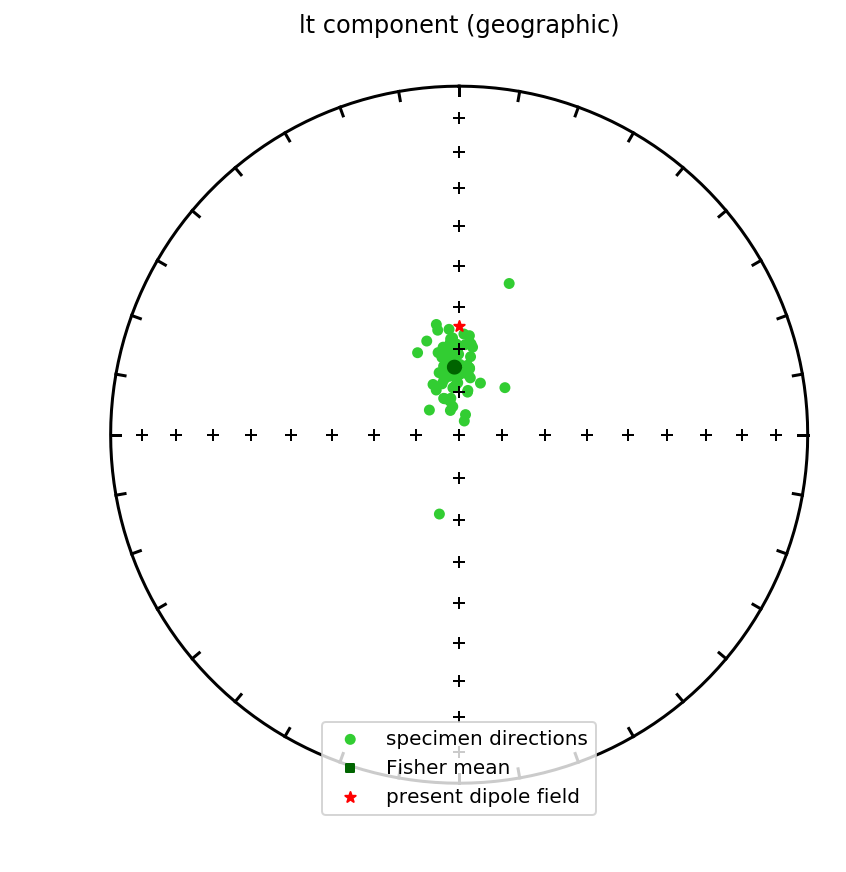

In [8]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

gad_inc = ipmag.inc_from_lat(location_lt['lat_n'].iloc[0])

ipmag.plot_di(dec=specimens_lt['dir_dec'].tolist(), 
              inc=specimens_lt['dir_inc'].tolist(), 
              color = lt_color_light,
              label='specimen directions')

ipmag.plot_di_mean(dec=location_lt['dir_dec'].iloc[0], 
                   inc=location_lt['dir_inc'].iloc[0], 
                   a95=location_lt['dir_alpha95'].iloc[0], 
                   color = lt_color_dark, marker='s',
                   label='Fisher mean')

ipmag.plot_di(dec=0,inc=gad_inc,color='red',marker='*',
              markersize=30,label='present dipole field')

plt.title('lt component (geographic)')
plt.legend(loc='lower center')
plt.show()

### mt component

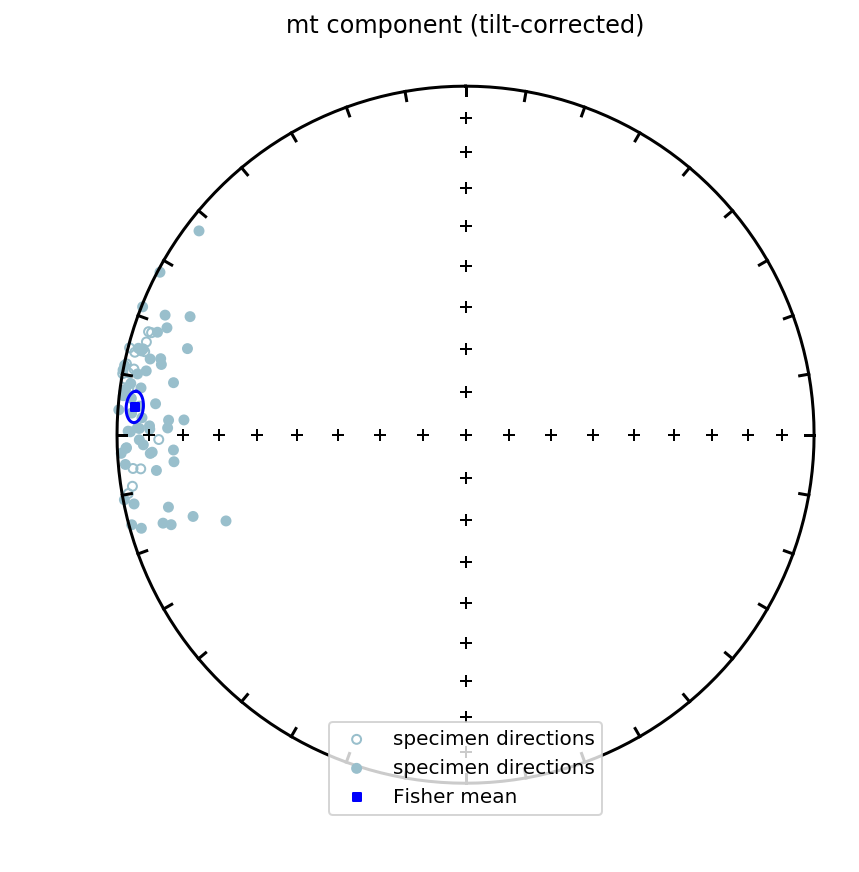

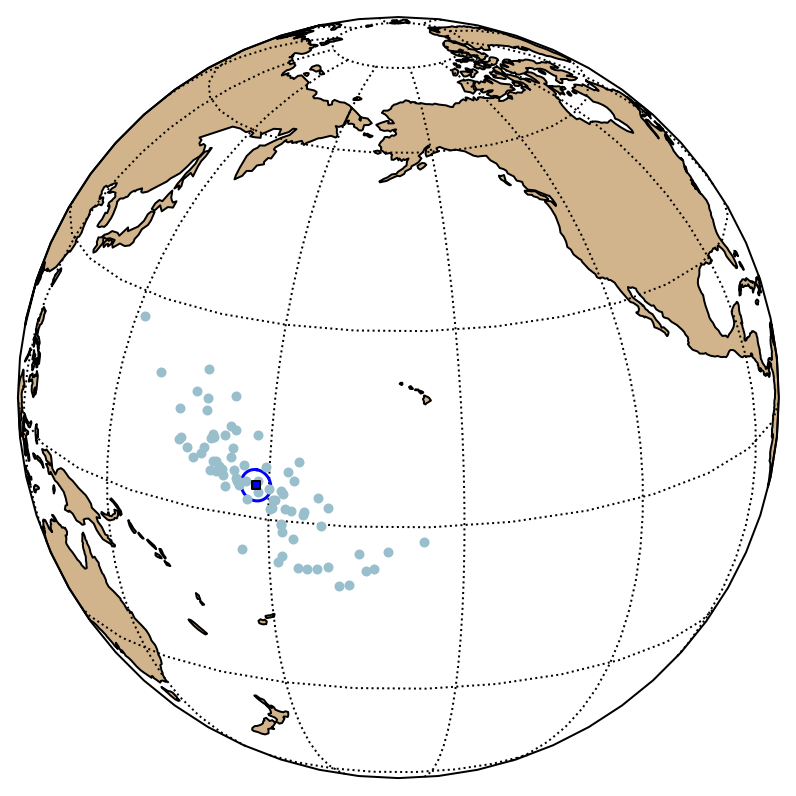

Plon: 177.9  Plat: 5.2
Number of directions in mean (n): 77
Angular radius of 95% confidence (A_95): 2.4
Precision parameter (k) estimate: 45.8


In [9]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=specimens_mt['dir_dec'].tolist(), 
              inc=specimens_mt['dir_inc'].tolist(), 
              color = mt_color_light, 
              label='specimen directions')

ipmag.plot_di_mean(dec=location_mt['dir_dec'].iloc[0], 
                   inc=location_mt['dir_inc'].iloc[0], 
                   a95=location_mt['dir_alpha95'].iloc[0], 
                   color = mt_color_dark, marker='s',
                   label='Fisher mean')

plt.title('mt component (tilt-corrected)')
plt.legend(loc='lower center')
plt.show()

mt_pole = ipmag.fisher_mean(sites_mt['vgp_lon'].tolist(), sites_mt['vgp_lat'].tolist())

mt_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))
ipmag.plot_vgp(mt_axis, sites_mt['vgp_lon'], sites_mt['vgp_lat'], 
               markersize = 25, color = mt_color_light, edge = 'none')
ipmag.plot_pole(mt_axis, mt_pole['dec'],mt_pole['inc'],mt_pole['alpha95'],
                color=mt_color_dark, marker='s')
plt.show()

ipmag.print_pole_mean(mt_pole)

### hct component

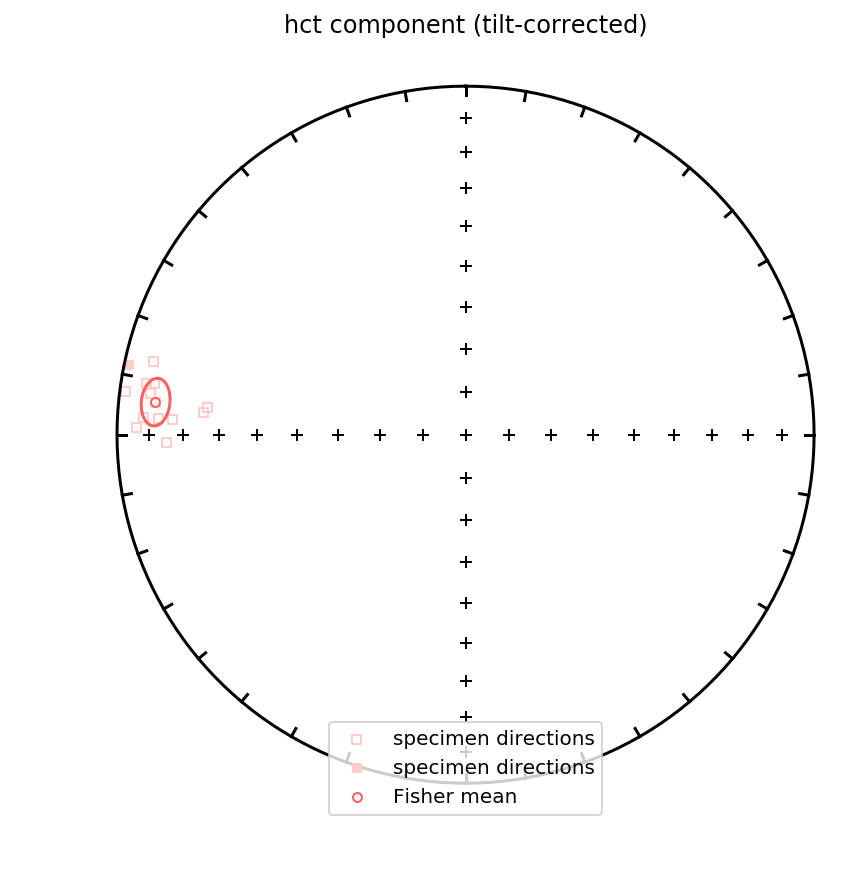

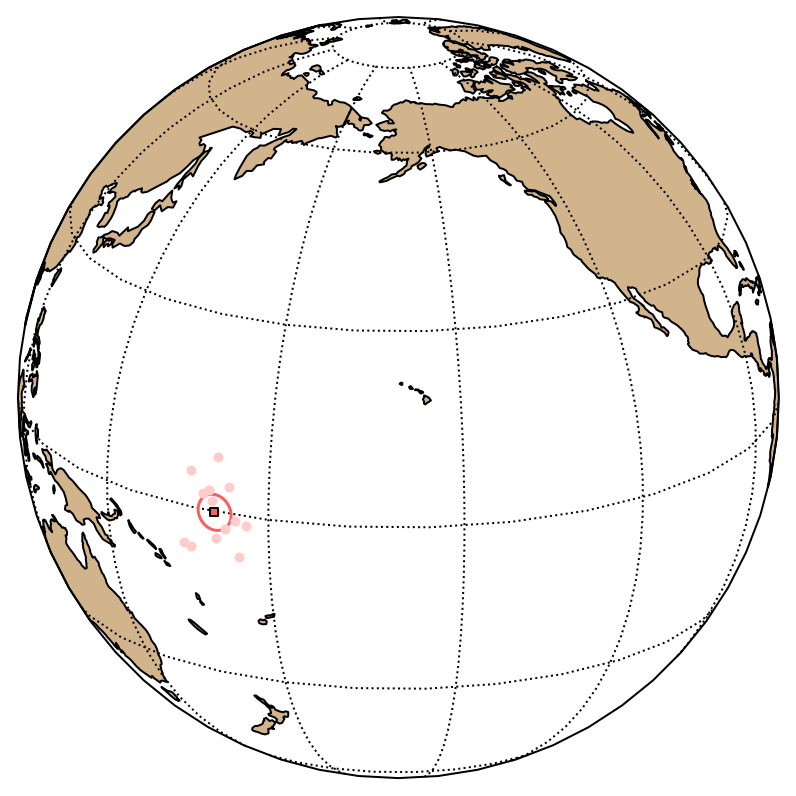

Plon: 171.1  Plat: -0.2
Number of directions in mean (n): 14
Angular radius of 95% confidence (A_95): 2.8
Precision parameter (k) estimate: 197.3


In [10]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=specimens_hct['dir_dec'].tolist(), 
              inc=specimens_hct['dir_inc'].tolist(), 
              color = hct_color_light, marker='s',
              label='specimen directions')

ipmag.plot_di_mean(dec=location_hct['dir_dec'].iloc[0], 
                   inc=location_hct['dir_inc'].iloc[0], 
                   a95=location_hct['dir_alpha95'].iloc[0], 
                   color = hct_color_dark,
                   label='Fisher mean')

plt.title('hct component (tilt-corrected)')
plt.legend(loc='lower center')
plt.show()

hct_pole = ipmag.fisher_mean(sites_hct['vgp_lon'].tolist(), sites_hct['vgp_lat'].tolist())

hct_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))
ipmag.plot_vgp(hct_axis, sites_hct['vgp_lon'], sites_hct['vgp_lat'], 
               markersize = 25, color = hct_color_light, edge = 'none')
ipmag.plot_pole(hct_axis, hct_pole['dec'],hct_pole['inc'],hct_pole['alpha95'],
                color=hct_color_dark, marker='s')
plt.show()

ipmag.print_pole_mean(hct_pole)

### mht remanence

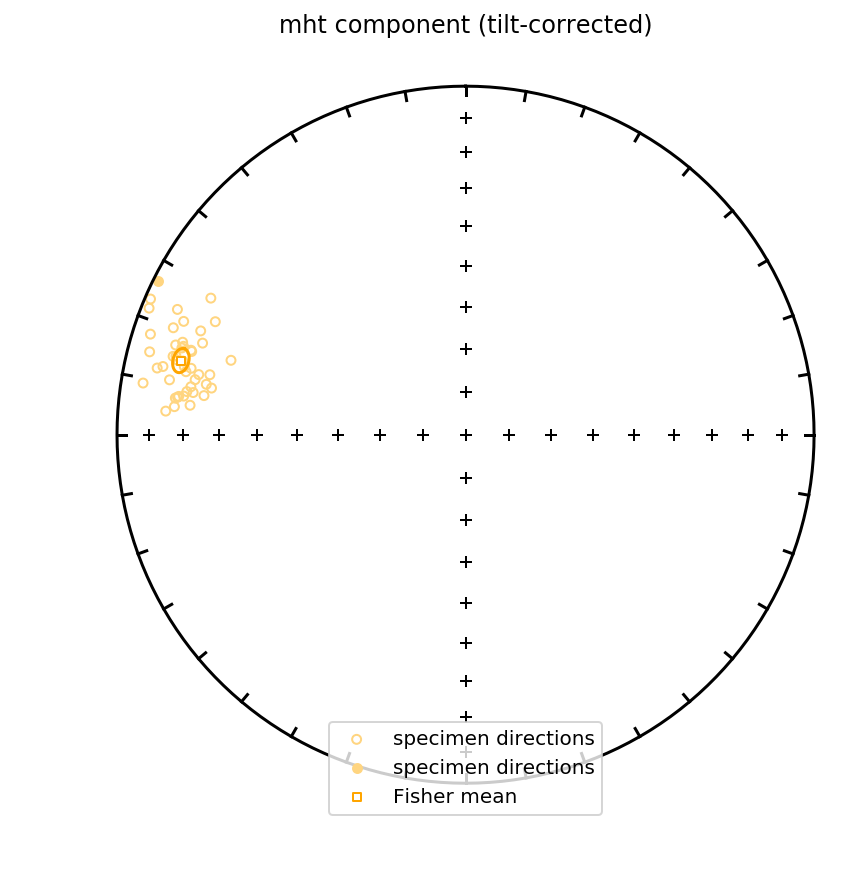

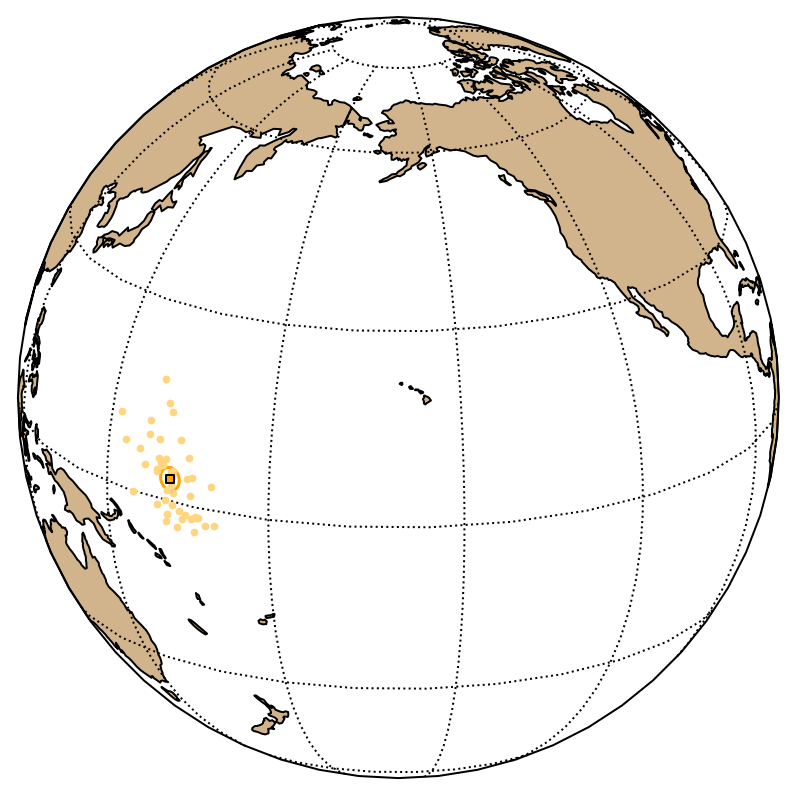

Plon: 163.0  Plat: 3.6
Number of directions in mean (n): 46
Angular radius of 95% confidence (A_95): 1.8
Precision parameter (k) estimate: 143.7


In [11]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=specimens_mht['dir_dec'].tolist(), 
              inc=specimens_mht['dir_inc'].tolist(), 
              color = mht_color_light,
              label='specimen directions')

ipmag.plot_di_mean(dec=location_mht['dir_dec'].iloc[0], 
                   inc=location_mht['dir_inc'].iloc[0], 
                   a95=location_mht['dir_alpha95'].iloc[0], 
                   color = mht_color_dark, marker='s',
                   label='Fisher mean')

plt.title('mht component (tilt-corrected)')
plt.legend(loc='lower center')
plt.show()

mht_pole = ipmag.fisher_mean(sites_mht['vgp_lon'].tolist(), sites_mht['vgp_lat'].tolist())

mht_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))
ipmag.plot_vgp(mht_axis, sites_mht['vgp_lon'], sites_mht['vgp_lat'], 
               markersize = 15, color = mht_color_light, edge = 'none')
ipmag.plot_pole(mht_axis, mht_pole['dec'],mht_pole['inc'],mht_pole['alpha95'],
                color=mht_color_dark, marker='s')
plt.show()

ipmag.print_pole_mean(mht_pole)

### hematite detrital remanence

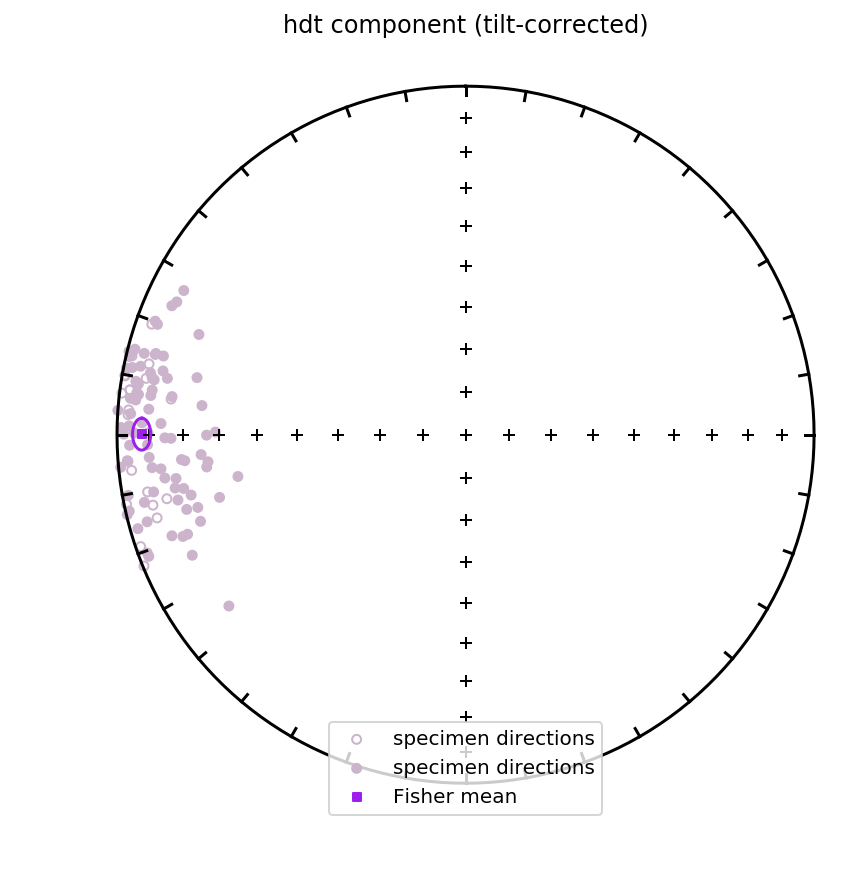

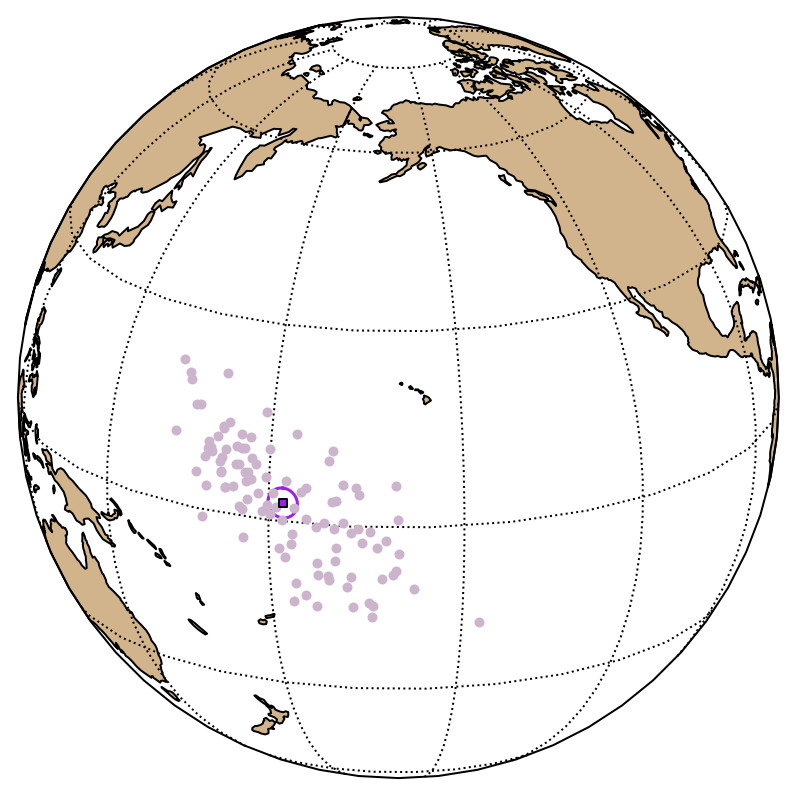

Plon: 182.2  Plat: 2.9
Number of directions in mean (n): 105
Angular radius of 95% confidence (A_95): 2.3
Precision parameter (k) estimate: 35.9


In [12]:
plt.figure(figsize = (6,6))
ipmag.plot_net()

ipmag.plot_di(dec=specimens_hdt['dir_dec'].tolist(), 
              inc=specimens_hdt['dir_inc'].tolist(), 
              color = hdt_color_light,
              label='specimen directions')

ipmag.plot_di_mean(dec=location_hdt['dir_dec'].iloc[0], 
                   inc=location_hdt['dir_inc'].iloc[0], 
                   a95=location_hdt['dir_alpha95'].iloc[0], 
                   color = hdt_color_dark, marker='s',
                   label='Fisher mean')

plt.title('hdt component (tilt-corrected)')
plt.legend(loc='lower center')
plt.show()

hdt_pole = ipmag.fisher_mean(sites_hdt['vgp_lon'].tolist(), sites_hdt['vgp_lat'].tolist())

hdt_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))
ipmag.plot_vgp(hdt_axis, sites_hdt['vgp_lon'], sites_hdt['vgp_lat'], 
               markersize = 25, color = hdt_color_light, edge = 'none')
ipmag.plot_pole(hdt_axis, hdt_pole['dec'],hdt_pole['inc'],hdt_pole['alpha95'],
                color=hdt_color_dark, marker='s')
plt.show()

ipmag.print_pole_mean(hdt_pole)

## Common mean test between detrital hematite and magnetite directions

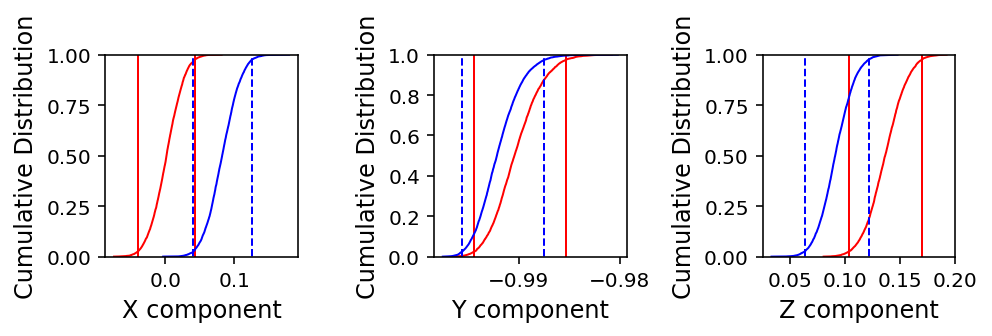

Pass


1

In [13]:
Nonesuch_hdt_directions= ipmag.make_di_block(specimens_hdt['dir_dec'].tolist(),
                                             specimens_hdt['dir_inc'].tolist())

Nonesuch_mt_directions= ipmag.make_di_block(specimens_mt['dir_dec'].tolist(),
                                             specimens_mt['dir_inc'].tolist())

ipmag.common_mean_bootstrap(Nonesuch_hdt_directions,Nonesuch_mt_directions)

## Fold test between these data and data developed by Henry et al. (1977)

Henry et al. (1977) developed data from the Nonesuch Formation using thermal demagnetization and chemical demagnetization. While we do not have access to measurement-level data, the published vector component diagrams are consistent with a remanence being held by detrital hematite.

<img src="./images/Henry1977_data.png">

Henry et al. (1977) identified the charecteristic direction (ChRM) and what they termed a secondary component. The data presented are consistent with their ChRM corresponding to the `hdt` component of in our study and their secondary component corresponding to the `hct` component in our study. 

The data from Henry et al. (1977) come from panels of distinct tilt which enables a regional fold test. Let's pull in the data of Henry et al. (1977) from MagIC in order to conduct a fold test.

### Import Henry et al. 1977 data

Note that some of the data within this contribution are sourced from the thesis of Henry (1976) that was published the year before.

In [14]:
Henry_samples = pd.read_csv('Henry1977_data/samples.txt',sep='\t',header=1)
Henry_specimens = pd.read_csv('Henry1977_data/specimens.txt',sep='\t',header=1)

In [15]:
Henry_samples_bedding = Henry_samples[['sample','bed_dip_direction','bed_dip']]
Henry_specimens = pd.merge(Henry_specimens,Henry_samples_bedding,on='sample')

### Split Henry et al. 1977 data out by component

In [16]:
Henry_specimens_Nonesuch = Henry_specimens[Henry_specimens['description']=='Nonesuch shale']
Henry_specimens_Nonesuch_PRIM = Henry_specimens_Nonesuch[Henry_specimens_Nonesuch['dir_comp']=='PRIM']
Henry_specimens_Nonesuch_SEC = Henry_specimens_Nonesuch[Henry_specimens_Nonesuch['dir_comp']=='SEC']

Henry_specimens_Nonesuch_PRIM_is = Henry_specimens_Nonesuch_PRIM[Henry_specimens_Nonesuch_PRIM['dir_tilt_correction']==0]
Henry_specimens_Nonesuch_PRIM_tc = Henry_specimens_Nonesuch_PRIM[Henry_specimens_Nonesuch_PRIM['dir_tilt_correction']==100]
Henry_specimens_Nonesuch_SEC_is = Henry_specimens_Nonesuch_SEC[Henry_specimens_Nonesuch_SEC['dir_tilt_correction']==0]
Henry_specimens_Nonesuch_SEC_tc = Henry_specimens_Nonesuch_SEC[Henry_specimens_Nonesuch_SEC['dir_tilt_correction']==100]

specimens_hdt_is = specimens[(specimens['dir_comp'] == 'hdt') & (specimens['dir_tilt_correction'] == 0)]
specimens_mt_is = specimens[(specimens['dir_comp'] == 'mt') & (specimens['dir_tilt_correction'] == 0)]
specimens_hct_is = specimens[(specimens['dir_comp'] == 'hct') & (specimens['dir_tilt_correction'] == 0)]

### Plot Henry et al. 1977 data along with data from this study

Plots of the Henry et al. 1977 data and data from this study are shown below in geographic (`['dir_tilt_correction']==0]`) and tilt-corrected (`['dir_tilt_correction']==100]`) coordinates.

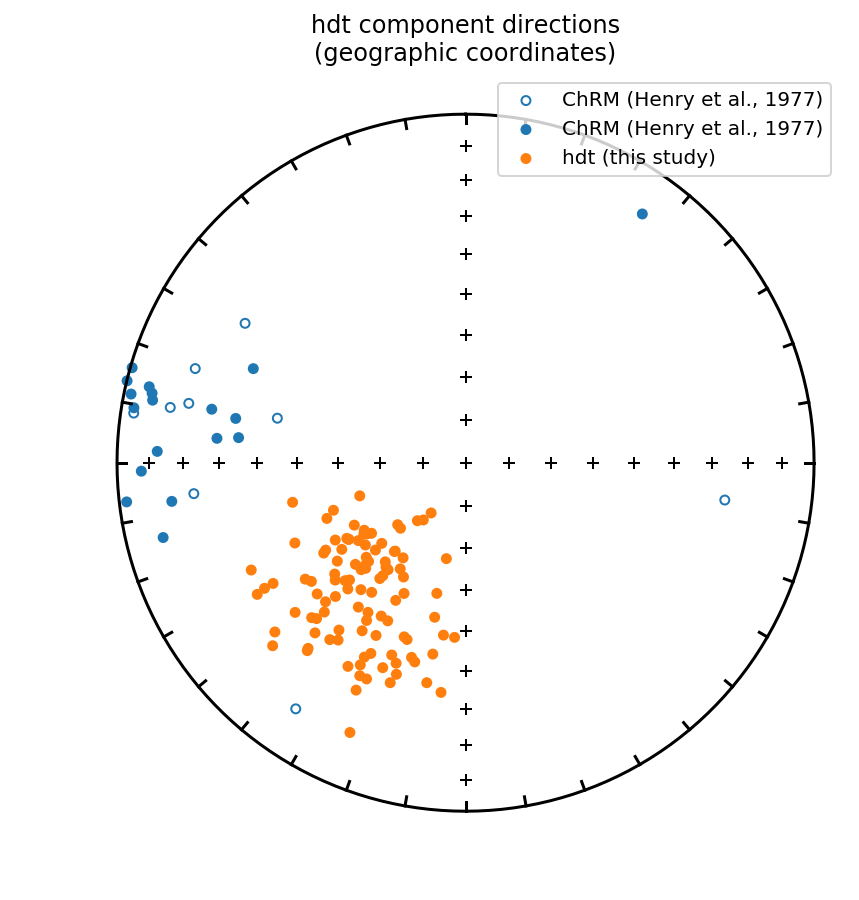

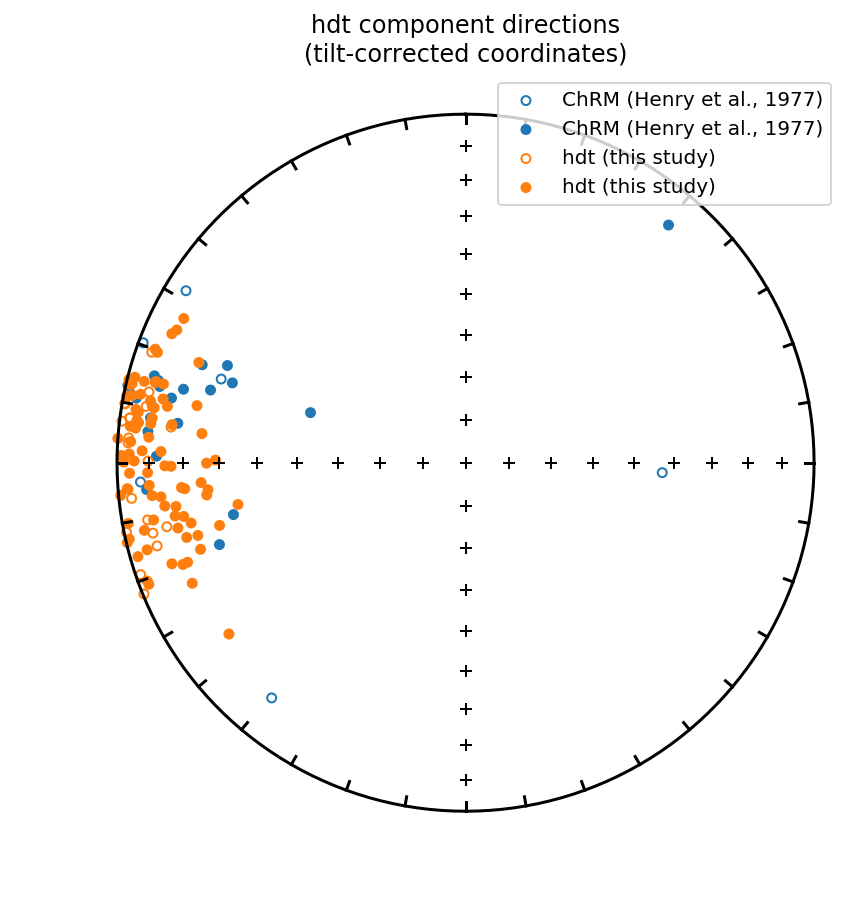

In [19]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_PRIM_is['dir_dec'].tolist(),
              Henry_specimens_Nonesuch_PRIM_is['dir_inc'].tolist(),
              color='C0', label='ChRM (Henry et al., 1977)')
ipmag.plot_di(specimens_hdt_is['dir_dec'].tolist(), 
              specimens_hdt_is['dir_inc'].tolist(),
              color='C1', label='hdt (this study)')
plt.legend(loc='upper right')
plt.title('hdt component directions\n(geographic coordinates)')

plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_PRIM_tc['dir_dec'].tolist(), 
              Henry_specimens_Nonesuch_PRIM_tc['dir_inc'].tolist(),
              color='C0', label='ChRM (Henry et al., 1977)')
ipmag.plot_di(specimens_hdt['dir_dec'].tolist(), 
              specimens_hdt['dir_inc'].tolist(),
              color='C1', label='hdt (this study)')
plt.title('hdt component directions\n(tilt-corrected coordinates)')
plt.legend(loc='upper right')
plt.show()

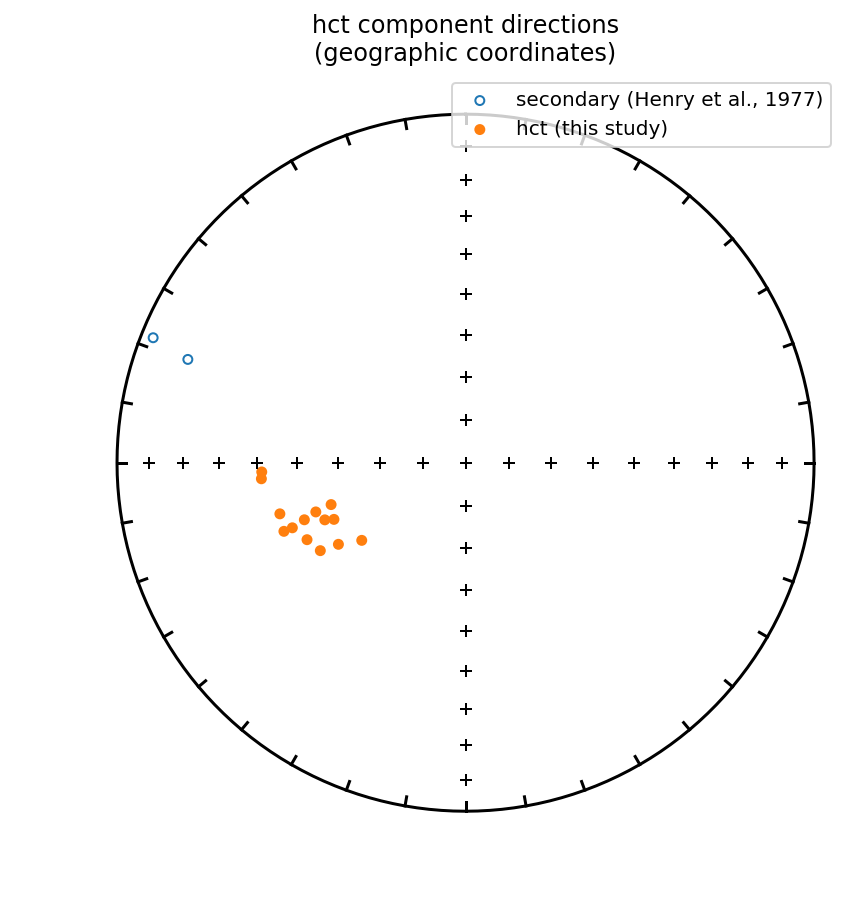

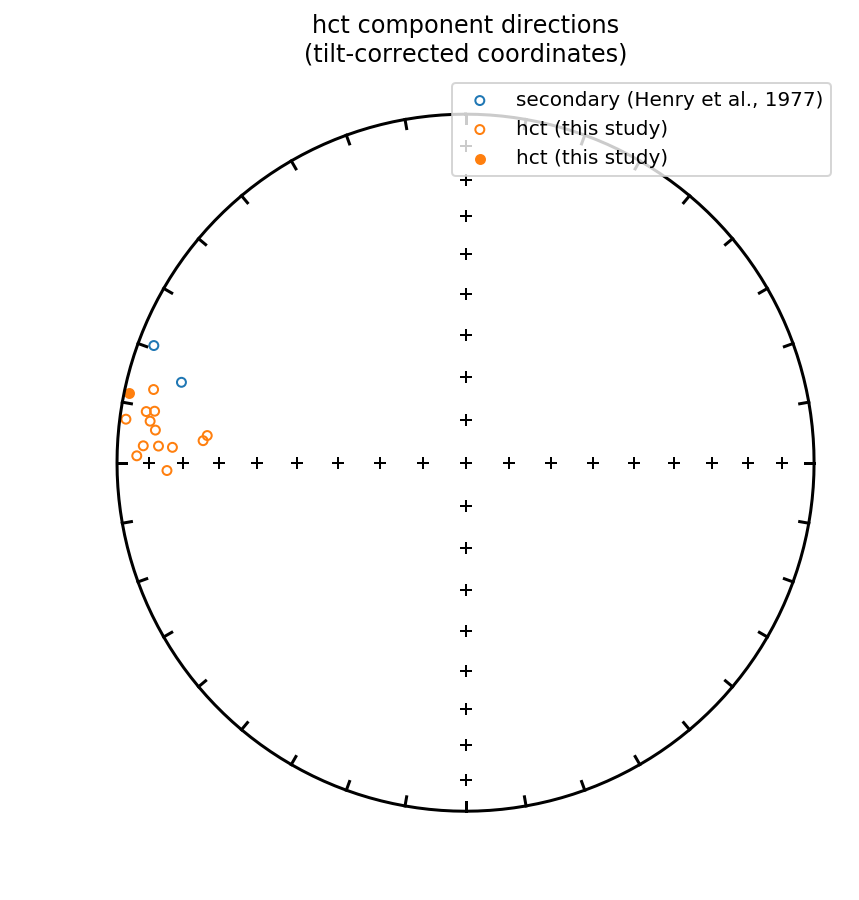

In [21]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_SEC_is['dir_dec'].tolist(),
              Henry_specimens_Nonesuch_SEC_is['dir_inc'].tolist(),
              color='C0', label='secondary (Henry et al., 1977)')
ipmag.plot_di(specimens_hct_is['dir_dec'].tolist(), 
              specimens_hct_is['dir_inc'].tolist(),
              color='C1', label='hct (this study)')
plt.legend(loc='upper right')
plt.title('hct component directions\n(geographic coordinates)')

plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(Henry_specimens_Nonesuch_SEC_tc['dir_dec'].tolist(), 
              Henry_specimens_Nonesuch_SEC_tc['dir_inc'].tolist(),
              color='C0', label='secondary (Henry et al., 1977)')
ipmag.plot_di(specimens_hct['dir_dec'].tolist(), 
              specimens_hct['dir_inc'].tolist(),
              color='C1', label='hct (this study)')
plt.title('hct component directions\n(tilt-corrected coordinates)')
plt.legend(loc='upper right')
plt.show()

### Collate the bedding measurements to conduct the fold test

In [22]:
Henry_drm_decs = Henry_specimens_Nonesuch_PRIM_is['dir_dec'].tolist()
Henry_drm_incs = Henry_specimens_Nonesuch_PRIM_is['dir_inc'].tolist()
Henry_drm_dip_directions = Henry_specimens_Nonesuch_PRIM_is['bed_dip_direction'].tolist()
Henry_drm_dips = Henry_specimens_Nonesuch_PRIM_is['bed_dip'].tolist()
    
Nonesuch_hdt_decs = specimens_hdt_is['dir_dec'].tolist()
Nonesuch_hdt_incs = specimens_hdt_is['dir_inc'].tolist()
Nonesuch_hdt_dip_directions = []
Nonesuch_hdt_dips = []

for n in specimens_hdt_is['sample']:
    bed_dip_direction = samples.loc[samples['sample'] == n, 'bed_dip_direction'].values[0]
    bed_dip = samples.loc[samples['sample'] == n, 'bed_dip'].values[0]
    Nonesuch_hdt_dip_directions.append(bed_dip_direction)
    Nonesuch_hdt_dips.append(bed_dip)

In [23]:
Nonesuch_DRM_diddd = ipmag.make_diddd_array(Henry_drm_decs+Nonesuch_hdt_decs,
                                            Henry_drm_incs+Nonesuch_hdt_incs,
                                            Henry_drm_dip_directions+Nonesuch_hdt_dip_directions,
                                            Henry_drm_dips+Nonesuch_hdt_dips)

### Conduct the bootstrap fold tests

In [25]:
ipmag.bootstrap_fold_test?

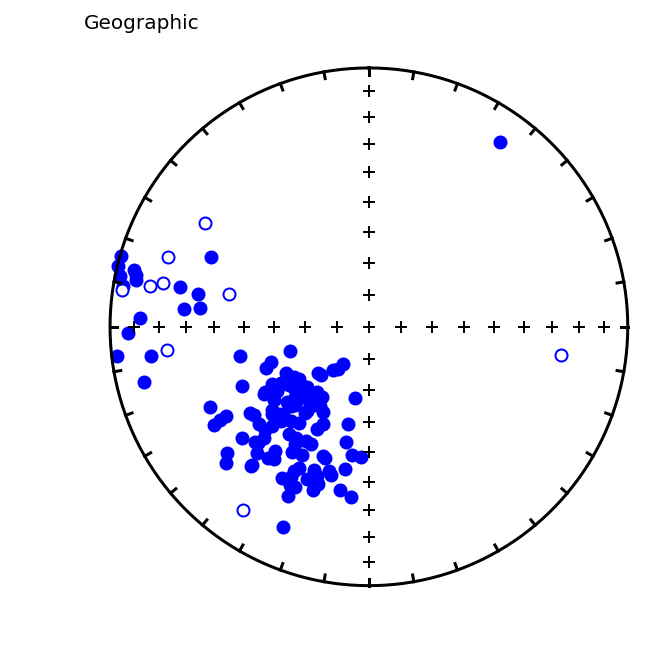

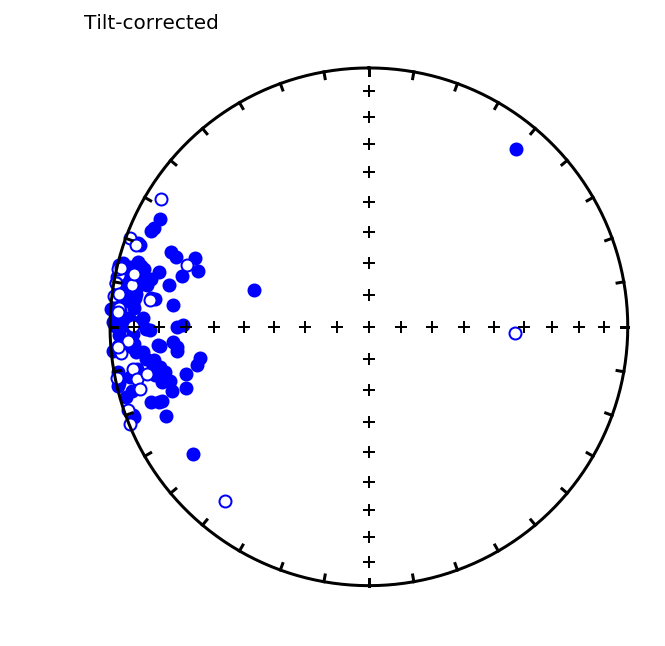

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
84 - 105 percent unfolding
range of all bootstrap samples: 
79  -  110 percent unfolding


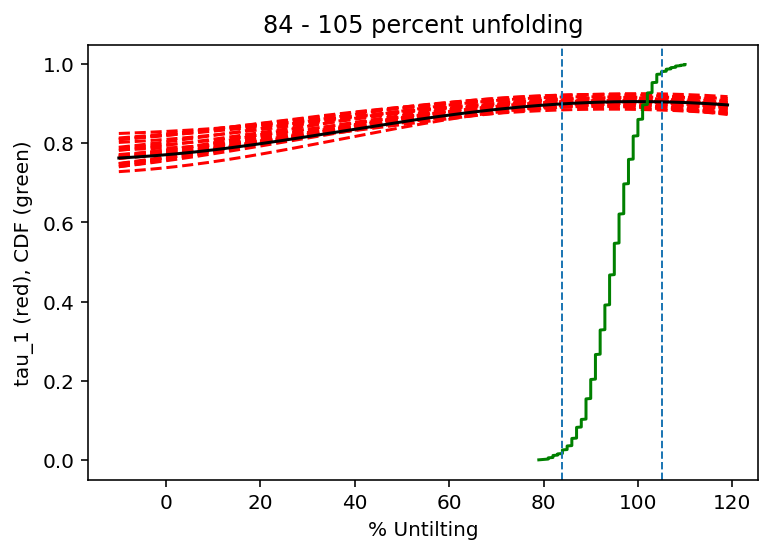

In [26]:
ipmag.bootstrap_fold_test(Nonesuch_DRM_diddd)

## Conduct E/I analysis on the hematite detrital remanence directions

The distribution of directions are consistent with being them being flattened in the horizontal plane associated within inclination shallowing. We we can use `ipmag.find_ei()` to estimate the flattening factor associated with this population of directions using the E/I approach of Tauxe and Kent (2004).

Bootstrapping.... be patient

The original inclination was: 7.78

The corrected inclination is: 15.22
with bootstrapped confidence bounds of: 10.81 to 19.51
and elongation parameter of: 2.61
The flattening factor is: 0.46
with bootstrapped confidence bounds of: 0.72 to 0.39


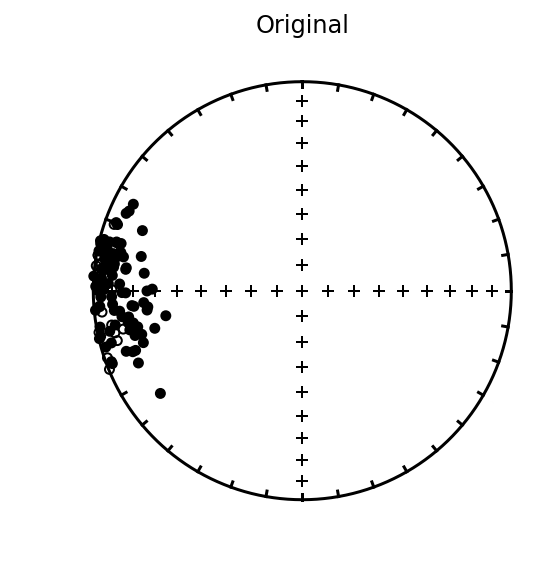

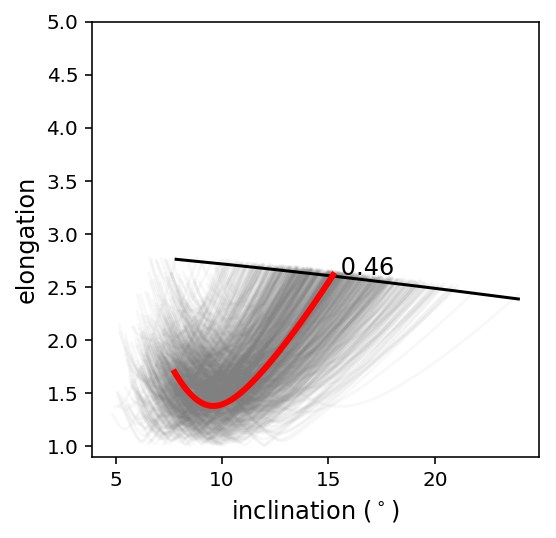

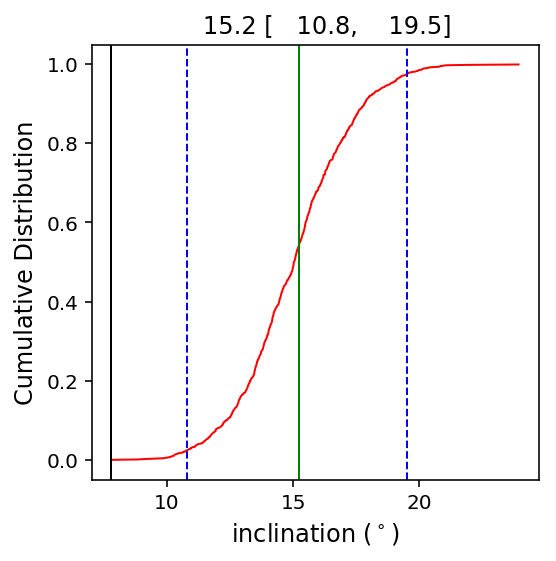

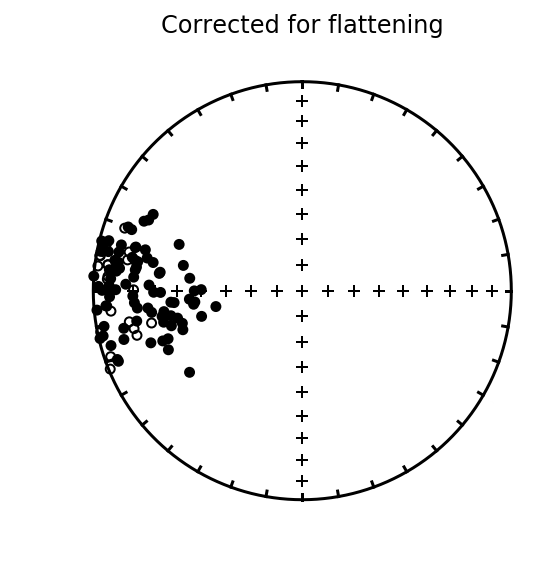

In [27]:
ipmag.find_ei(Nonesuch_hdt_directions)

### Using a "blanket" flattening factor to correct the `hdt` directions and calculate a paleomagnetic pole

In [29]:
flattening_factor = 0.46

hdt_decs = specimens_hdt['dir_dec'].tolist()
hdt_unsquished_incs = ipmag.unsquish(specimens_hdt['dir_inc'].tolist(), flattening_factor)

hdt_unsquished_dirs_locs = []
locality_lat = 46.461
locality_lon = -90.530

for n in range(0, len(hdt_decs)):
    hdt_unsquished_dirs_locs.append([hdt_decs[n], hdt_unsquished_incs[n], 1.0, locality_lat, locality_lon])

Shown below are the VGPs not corrected for inclination shallowing and then the inclination-corrected VGPs (at a single value of 0.46) and associated Fisher mean pole.

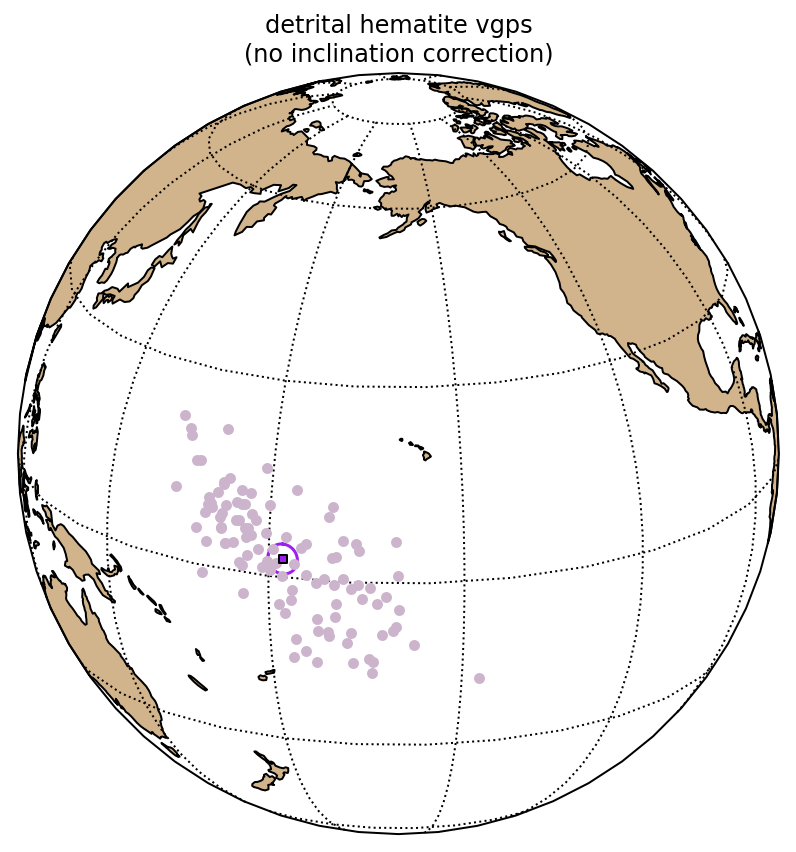

In [33]:
hdt_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))

ipmag.plot_vgp(hdt_axis, sites_hdt['vgp_lon'], sites_hdt['vgp_lat'], 
               markersize = 30, color = hdt_color_light, edge = 'none')
ipmag.plot_pole(hdt_axis, hdt_pole['dec'],hdt_pole['inc'],hdt_pole['alpha95'],
                color=hdt_color_dark, marker='s')
plt.title('detrital hematite vgps\n(no inclination correction)')
plt.show()

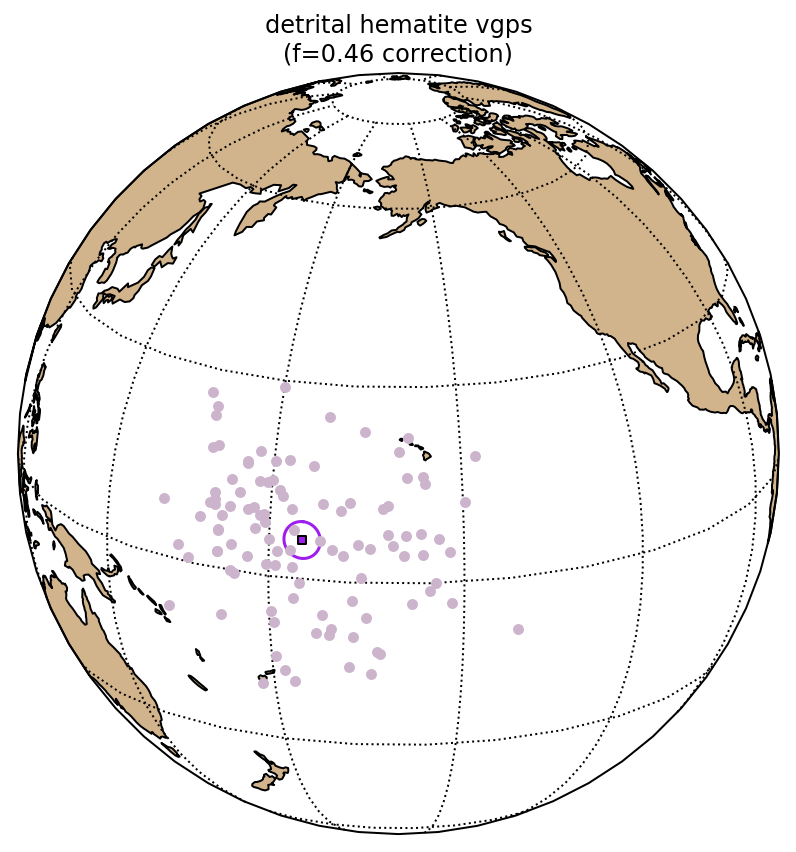

In [34]:
hdt_unsquished_plon, hdt_unsqushed_plat, dp, dm = pmag.dia_vgp(hdt_unsquished_dirs_locs)
hdt_unsquished_pole = ipmag.fisher_mean(hdt_unsquished_plon, hdt_unsqushed_plat)

hdt_axis = ipmag.make_orthographic_map(200, 20, figsize=(7,7))

ipmag.plot_vgp(hdt_axis, hdt_unsquished_plon, 
               hdt_unsqushed_plat, markersize = 30, color = hdt_color_light, 
               edge = 'none')
ipmag.plot_pole(hdt_axis, plon=hdt_unsquished_pole['dec'], 
                   plat=hdt_unsquished_pole['inc'], 
                   A95=hdt_unsquished_pole['alpha95'], 
                   color = hdt_color_dark, marker='s')
plt.title('detrital hematite vgps\n(f=0.46 correction)')
plt.show()

## Incorporating inclination shallowing uncertainty into the paleomagnetic pole

The typical approach when applying the E/I method is to get an estimate of "the flattening factor" and apply that to correct the pole as done above. However, there is a range of estimated flattening factors that come out of the bootstrapped resampling scheme of the E/I method.

A recently published approach develops a method to incorporate this f factor uncertainty into the uncertainty associated with the paleomagnetic pole by utilizing all of the f factors that are returned through the E/I method.

> Pierce, J., Zhang, Y., Hodgin, E. B.,
& Swanson-Hysell, N. L. (2022).
Quantifying inclination shallowing
and representing flattening uncertainty
in sedimentary paleomagnetic poles.
Geochemistry, Geophysics, Geosystems,
23, e2022GC010682. https://doi.org/10.1029/2022GC010682

The function `ipmag.find_ei_kent` implements this method that returns a 95% confidence Kent mean ellipse.

### `ipmag.find_ei_kent` applied to detrital hematite (`hdt`) directions

Bootstrapping.... be patient



TypeError: You must first set_array for mappable

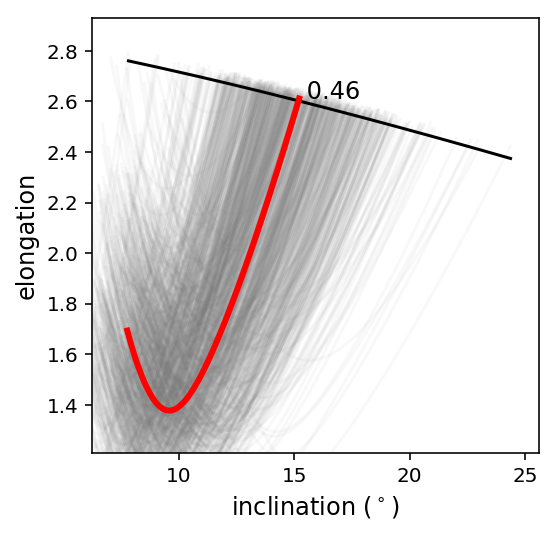

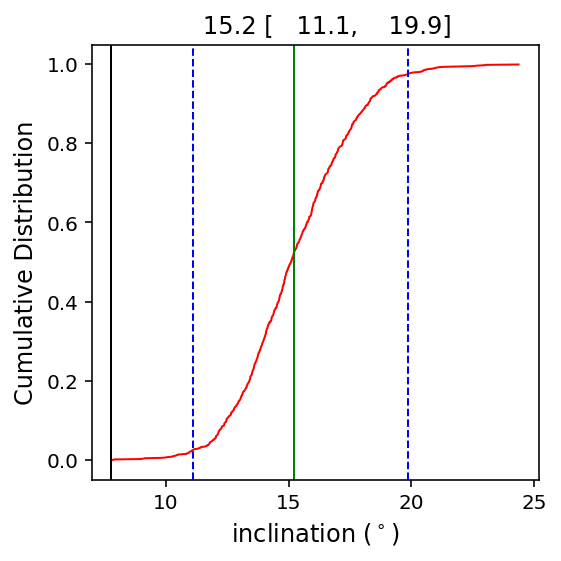

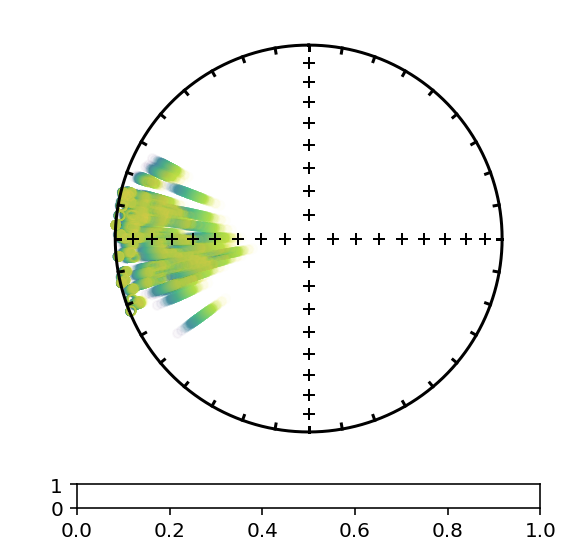

In [36]:
hem_result_dir, hem_kent_stats, hem_I, hem_E, hem_F  = ipmag.find_ei_kent(Nonesuch_hdt_directions, 
                        site_latitude=46.5,
                        site_longitude=-90.5,
                        kent_color='k',
                        nb=1000,
                        save=False,
                        return_new_dirs=1,
                        return_values=1,
                        figprefix='EI_hem_',
                        num_resample_to_plot=1000,
                        EI_color='r',
                        resample_EI_color='grey',
                        resample_EI_alpha=0.05,
                        vgp_nb=100,
                        cmap='viridis_r',
                        central_longitude=200,
                        central_latitude=20 )

### `ipmag.find_ei_kent` applied to detrital magnetite (`mt`) directions

Bootstrapping.... be patient



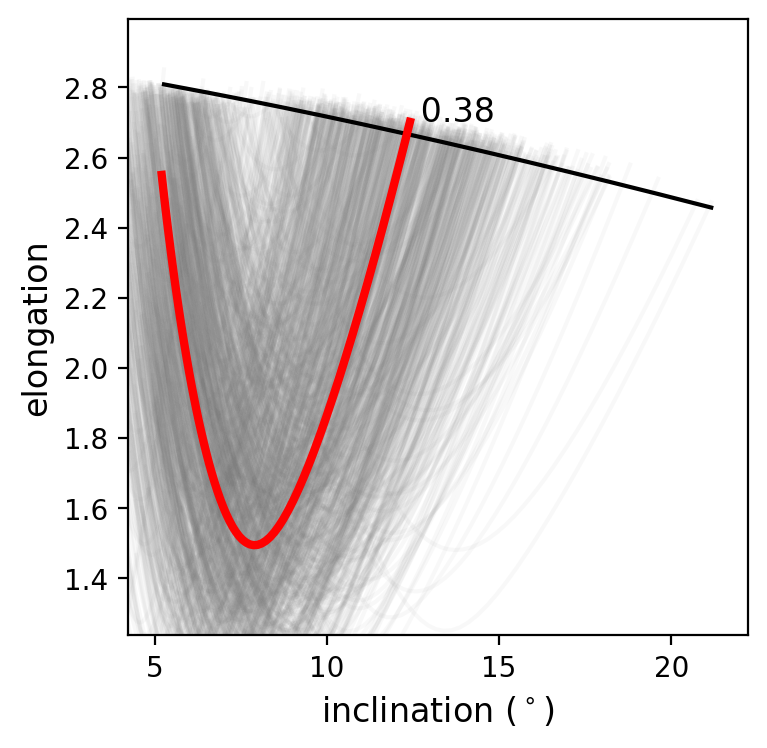

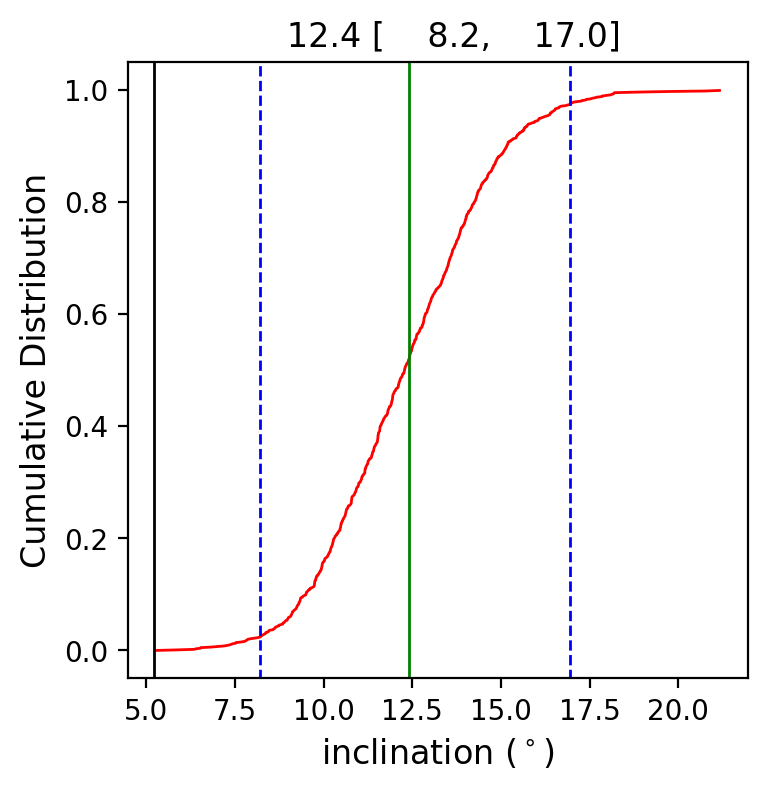

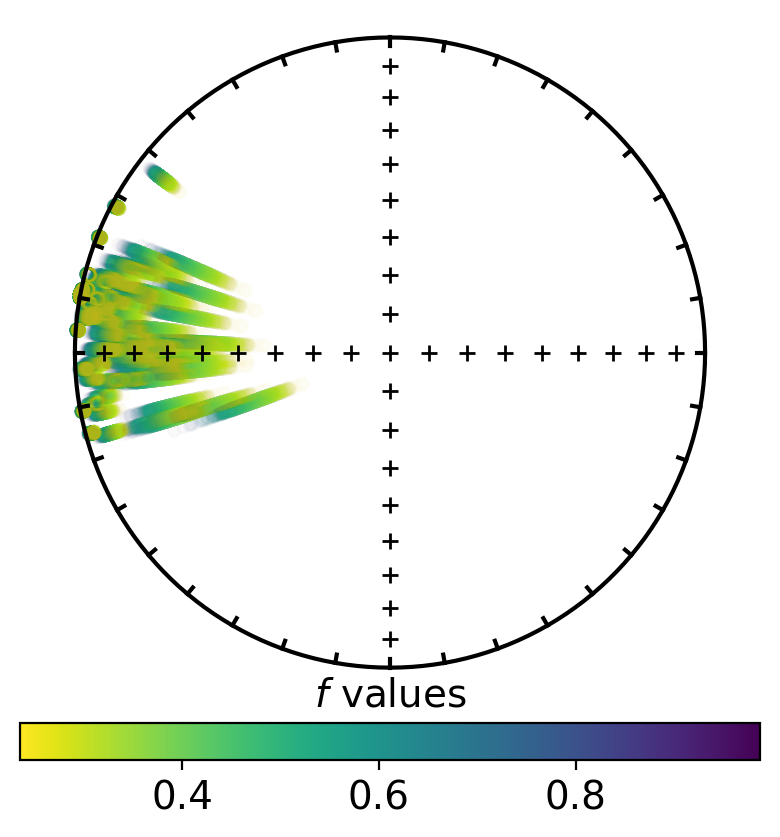

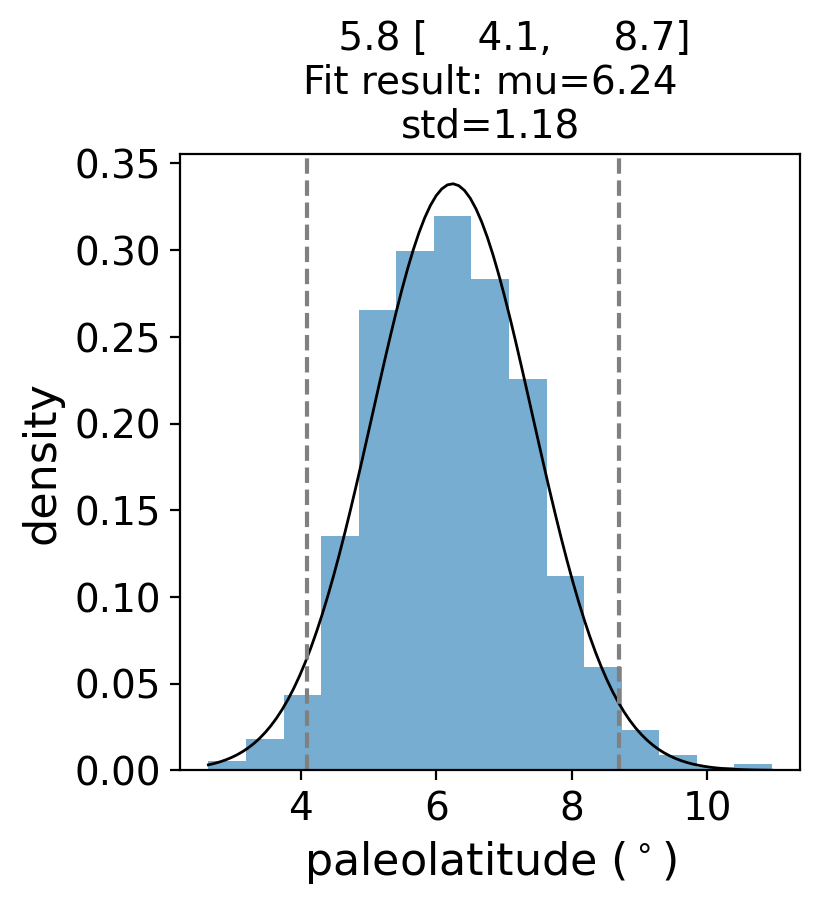

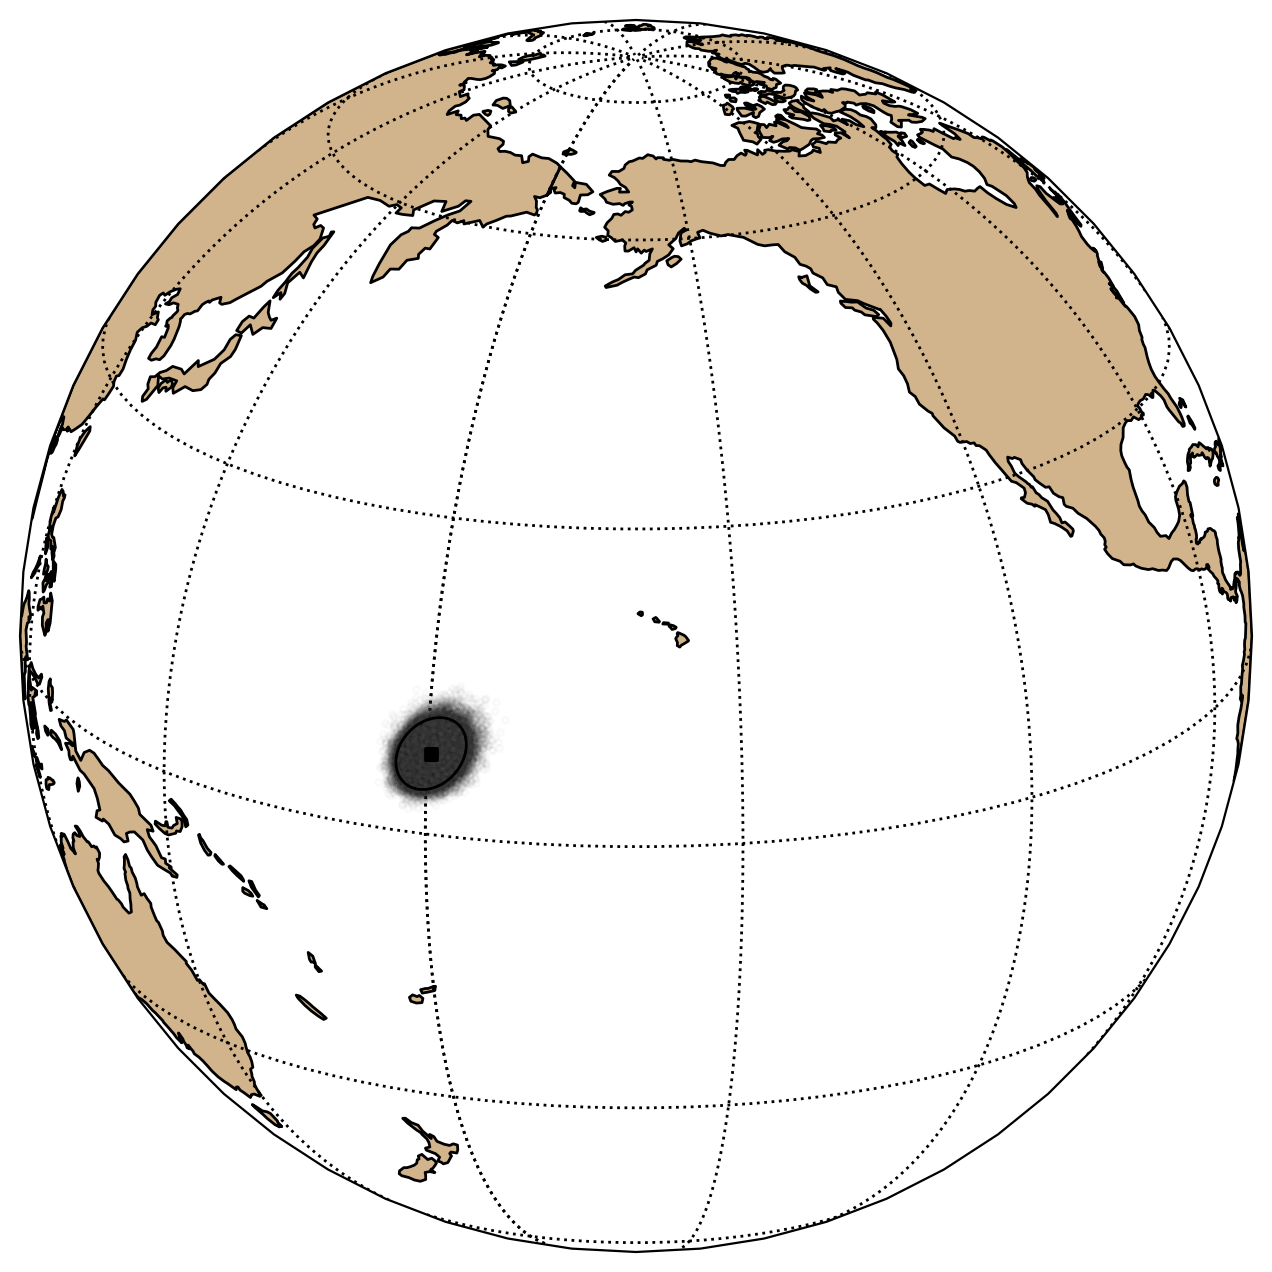

The original inclination was: 5.2

The corrected inclination is: 12.41
with bootstrapped confidence bounds of: 8.22 to 16.95
and elongation parameter of: 2.7
The flattening factor is: 0.38
with bootstrapped confidence bounds of: 0.63 to 0.3

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 180.3  Plat: 7.8
Major axis lon: 278.9  Major axis lat: 47.4
Minor axis lon: 83.4  Minor axis lat: 41.5
Major axis angle of 95% ellipse (Zeta): 4.0
Minor axis angle of 95% ellipse (Eta): 2.9
Number of directions in mean (n): 100000


In [28]:
mag_result_dir, mag_kent_stats, mag_I, mag_E, mag_F  = ipmag.find_ei_kent(Nonesuch_mt_directions, 
                        site_latitude=46.5,
                        site_longitude=-90.5,
                        kent_color='k',
                        nb=1000,
                        save=1,
                        save_folder='code_output/',
                        fmt='png',
                        return_new_dirs=1,
                        return_values=1,
                        figprefix='EI_mag_',
                        num_resample_to_plot=1000,
                        EI_color='r',
                        resample_EI_color='grey',
                        resample_EI_alpha=0.05,
                        vgp_nb=100,
                        cmap='viridis_r',
                        central_longitude=200,
                        central_latitude=20 )

### `ipmag.find_ei_kent` applied to combined detrital magnetite and hematite directions

Bootstrapping.... be patient



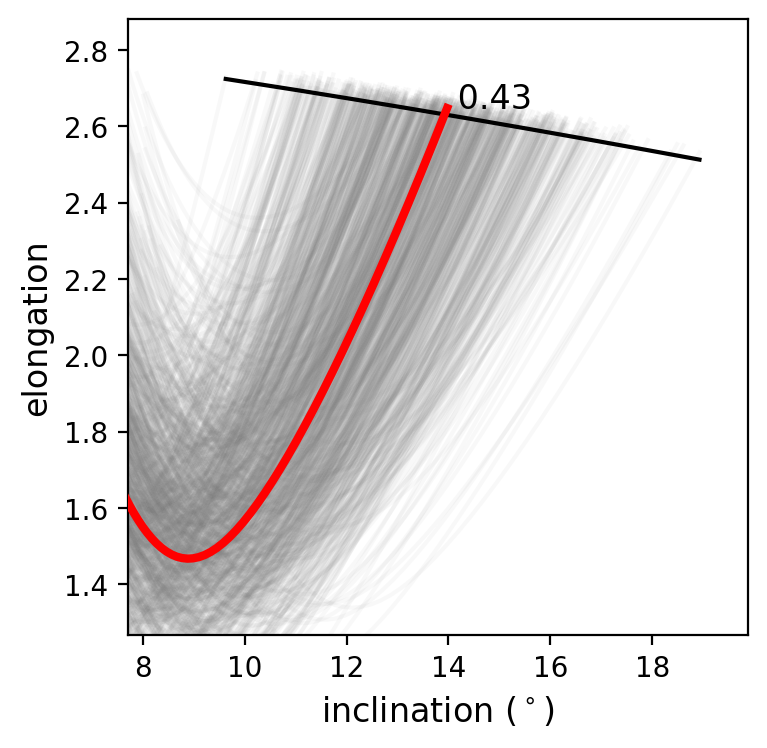

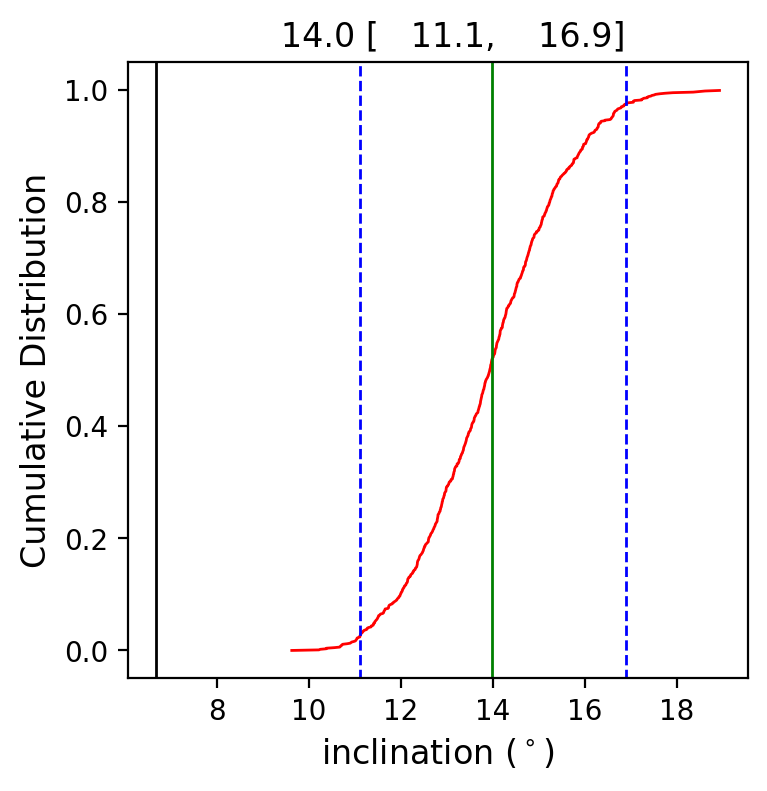

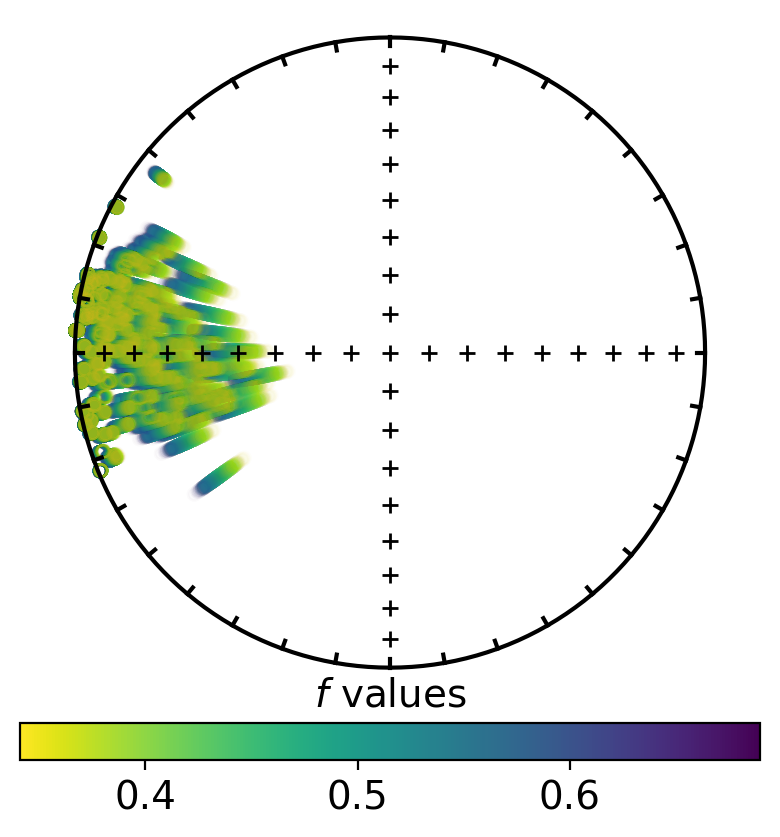

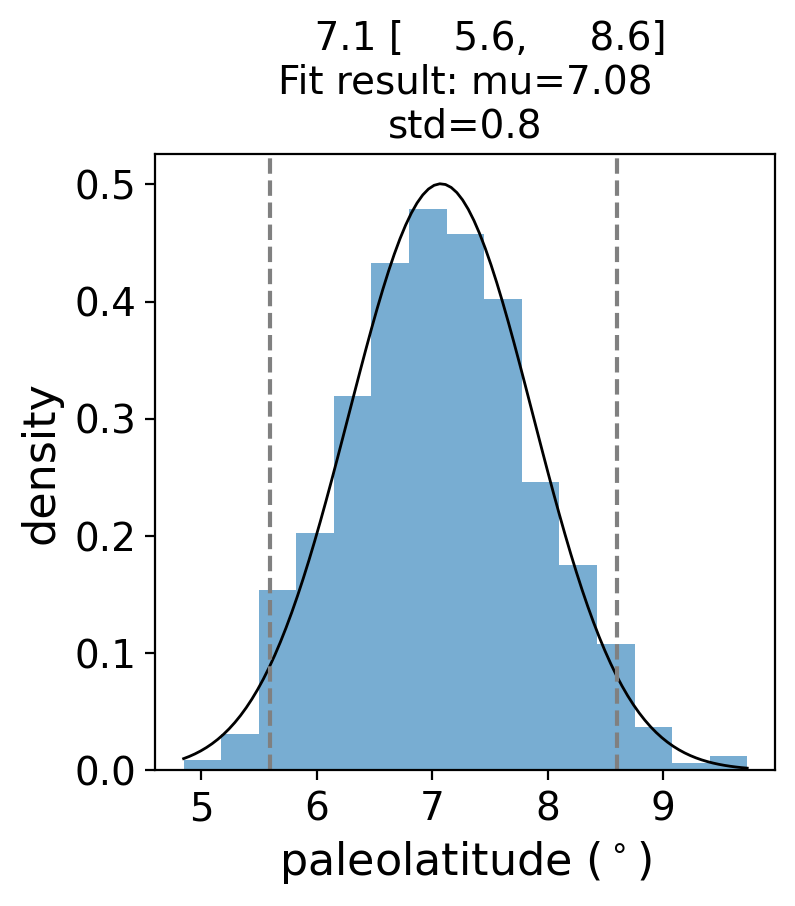

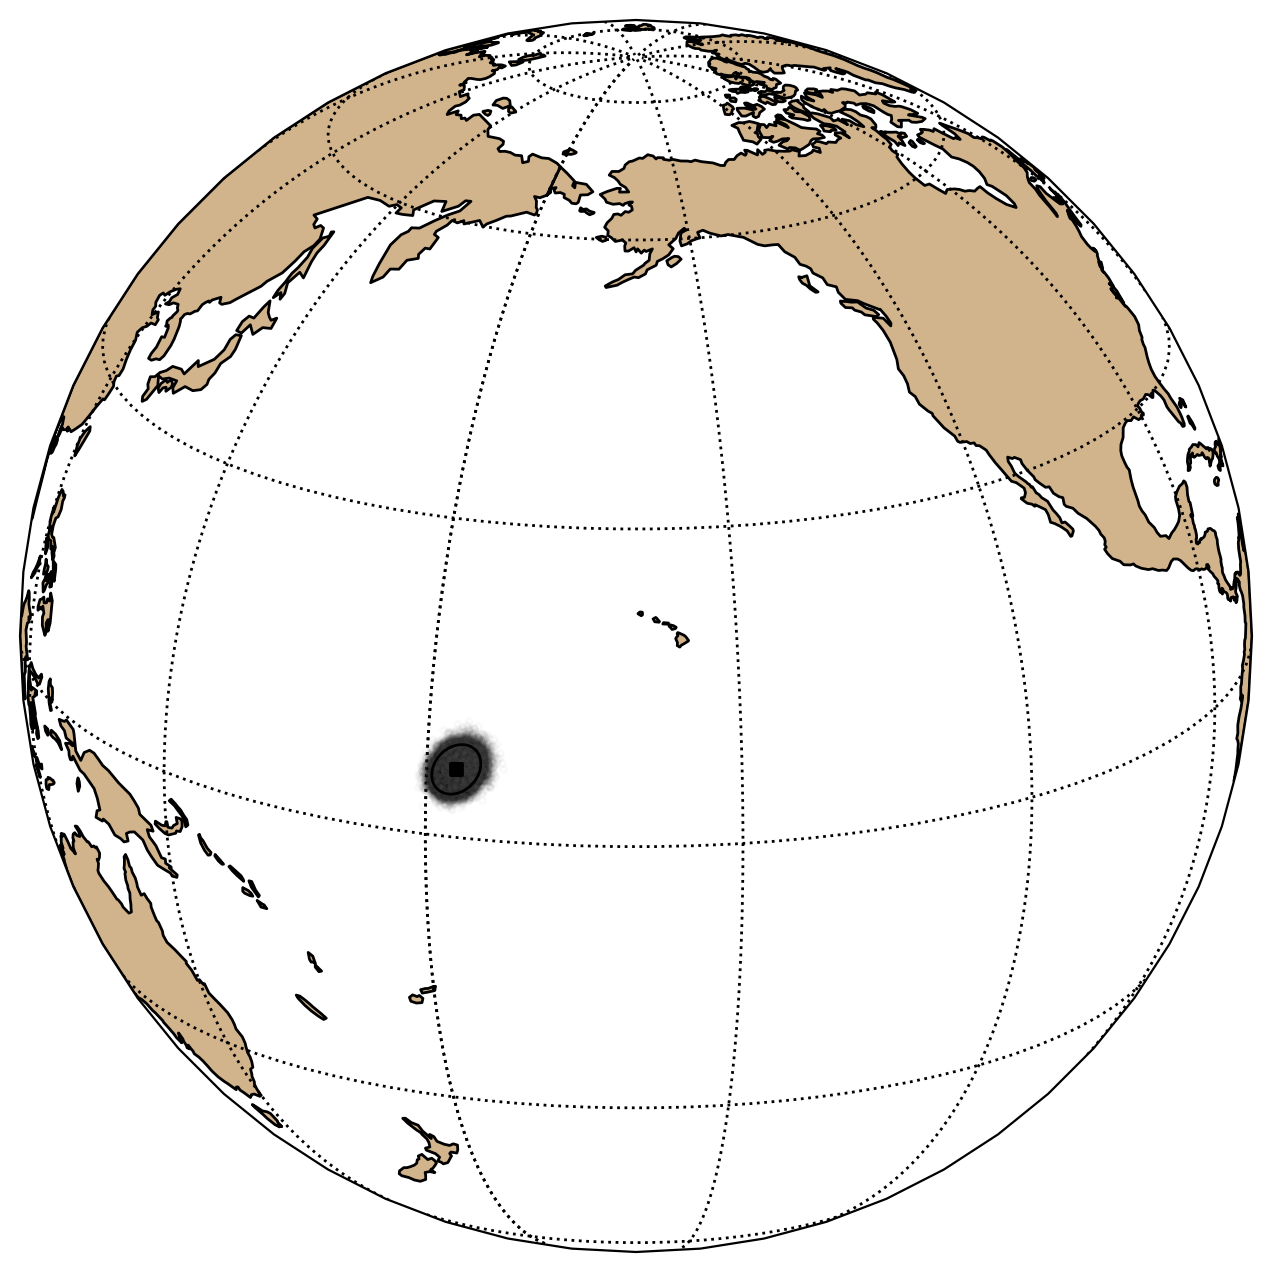

The original inclination was: 6.67

The corrected inclination is: 13.97
with bootstrapped confidence bounds of: 11.11 to 16.9
and elongation parameter of: 2.65
The flattening factor is: 0.43
with bootstrapped confidence bounds of: 0.6 to 0.39

The Kent mean incorporating inclination flattening uncertainty is:
Plon: 182.9  Plat: 6.6
Major axis lon: 280.1  Major axis lat: 47.4
Minor axis lon: 87.0  Minor axis lat: 41.8
Major axis angle of 95% ellipse (Zeta): 2.7
Minor axis angle of 95% ellipse (Eta): 2.0
Number of directions in mean (n): 100000


In [29]:
combined_result_dir, combined_kent_stats, I, E, F  = ipmag.find_ei_kent(Nonesuch_hdt_directions+Nonesuch_mt_directions, 
                        site_latitude=46.5,
                        site_longitude=-90.5,
                        kent_color='k',
                        nb=1000,
                        save=0,
                        save_folder='code_output/',
                        fmt='png',
                        return_new_dirs=1,
                        return_values=1,
                        figprefix='EI',
                        num_resample_to_plot=1000,
                        EI_color='r',
                        resample_EI_color='grey',
                        resample_EI_alpha=0.05,
                        vgp_nb=100,
                        cmap='viridis_r',
                        central_longitude=200,
                        central_latitude=20 )

## Plot paleomagnetic poles incorporating inclination correction uncertainty

NameError: name 'hem_kent_stats' is not defined

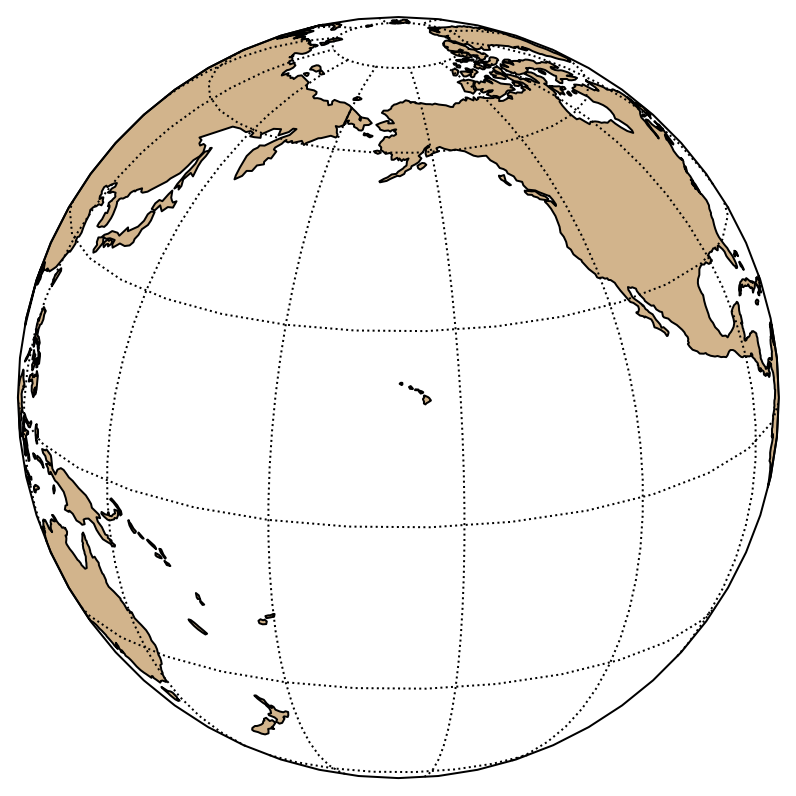

In [37]:
ax = ipmag.make_orthographic_map(200, 20,figsize=(7,7))

ipmag.plot_pole_ellipse(ax,hem_kent_stats, color=hdt_color_dark, markersize=50,  edgecolor='None',
                        label='mean pole from\ndetrital hematite\nremanence')
ipmag.plot_pole_ellipse(ax,mag_kent_stats, color=mt_color_dark, markersize=50,  edgecolor='None',
                        label='mean pole from\ndetrital magnetite\nremanence')
ipmag.plot_pole_ellipse(ax,combined_kent_stats, color='k', markersize=50, edgecolor='None', 
                        label='mean pole from\ncombined remanence')

plt.legend(fontsize=13, bbox_to_anchor=(0.75, 0.35))
plt.savefig('./code_output/kent_ellipses.pdf', bbox_inches='tight')
plt.show()

## Plotting these poles in the context of the Keweenawan Track

There are abundant paleomagnetic poles associated with volcanics of the Midcontinent Rift from ca. 1109 to 1084 Ma. The ca. 1075 Ma Nonesuch pole is plotted below in the context of these poles.

In [31]:
Keweenawan_track = pd.read_csv('../Data/mcplates_results/pole_means.csv')
Keweenawan_track_igneous = Keweenawan_track.iloc[:Keweenawan_track.shape[0]-2].reset_index(drop=1)
Keweenawan_track_seds = Keweenawan_track.iloc[Keweenawan_track.shape[0]-2:].reset_index(drop=1)
Keweenawan_track_seds

Polarity            PoleName  SLat   SLon  PLat   PLon  A95   K   N  \
0  Nonesuch  Nonesuch Formation  46.7  270.1   7.6  178.1  5.6 NaN  11   
1     Freda     Freda Formation  46.7  270.1   2.2  179.0  4.2 NaN  20   

                              PolarityZone  \
0  Portage Lake normal-polarity zone (sed)   
1  Portage Lake normal-polarity zone (sed)   

                                            PmagRef  AgeNominal  AgeLower  \
0                                Henry et al., 1977      1080.0    1070.0   
1  Palmer and Davis (1987); Fairchild et al. (2017)      1070.0    1060.0   

   AgeUpper                                            AgeInfo AgeRef  \
0    1083.5  Likely younger than Michipicoten Island Format...    NaN   
1    1083.5  Data come from lowermost Freda Formation. Inte...    NaN   

   Gaussian_2sigma GaussianOrUniform   Q    color  
0              NaN           uniform NaN  #B3D566  
1              NaN           uniform NaN  #D5C888

In [32]:
Nonesuch_hct_fisher_stats = [171.2, -0.1, 4.3]

Nonesuch_combined_kent_stats = {'dec': 182.892105803057,
                        'inc': 6.585337069646001,
                        'n': 100000,
                        'Zdec': 87.0038994571064,
                        'Zinc': 41.62531882096686,
                        'Edec': 280.1596746424632,
                        'Einc': 47.61695582840921,
                        'Zeta': 2.0171278015985,
                        'Eta': 2.7995678733604663,
                        'R1': 0.9996976150500494,
                        'R2': 0.00019126441587235128}

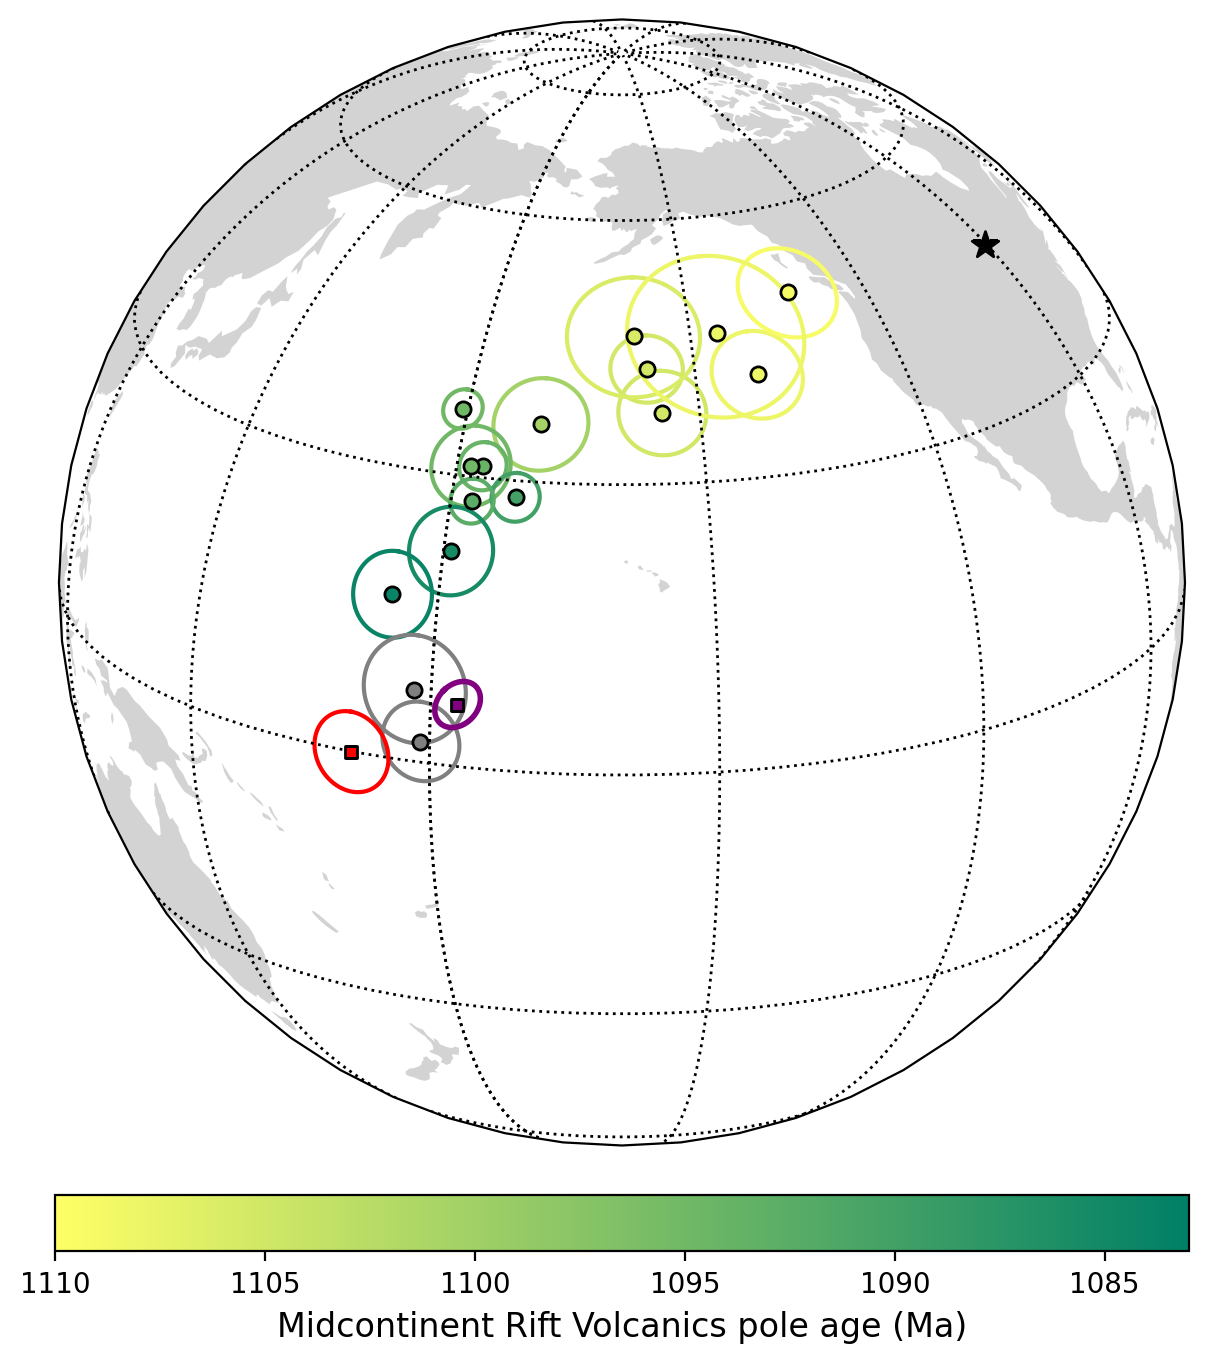

In [33]:
import matplotlib
import matplotlib.colors as colors

m = ipmag.make_orthographic_map(200, 20, land_color='lightgrey', land_edge_color='None')

vmin=1083
vmax=1110
cNorm = colors.Normalize(vmin, vmax)
Keween_scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='summer')


for n in range(Keweenawan_track_igneous.shape[0]):
    rgba = Keween_scalarMap.to_rgba(Keweenawan_track_igneous['AgeNominal'][n])
    hex_color = colors.rgb2hex(rgba)
    ipmag.plot_pole(m,Keweenawan_track_igneous['PLon'][n],Keweenawan_track_igneous['PLat'][n],Keweenawan_track_igneous['A95'][n],
                    color=hex_color, markersize=30, edgecolor='k')

for n in range(Keweenawan_track_seds.shape[0]):
    ipmag.plot_pole(m,Keweenawan_track_seds['PLon'][n],Keweenawan_track_seds['PLat'][n],Keweenawan_track_seds['A95'][n],
                    color='gray', markersize=30, edgecolor='k')

ipmag.plot_pole(m, Nonesuch_hct_fisher_stats[0], Nonesuch_hct_fisher_stats[1], Nonesuch_hct_fisher_stats[2], marker='s', color='red')

ipmag.plot_pole_ellipse(m, Nonesuch_combined_kent_stats, color='purple', lw=2)

ipmag.plot_vgp(m, -90.5 , 46.5, marker='*', markersize=100, color='k')

cbar=plt.colorbar(Keween_scalarMap,orientation='horizontal',fraction=0.046, pad=0.04, label='Midcontinent Rift Volcanics pole age (Ma)')
cbar.ax.invert_xaxis()
cbar.set_label(label='Midcontinent Rift Volcanics pole age (Ma)', fontsize=12)

plt.savefig('./code_output/Nonesuch_Keweenawan_track.pdf', bbox_inches='tight')
plt.show()

## Paleogeographic reconstruction

Using the inclination corrected Nonesuch paleomagnetic pole constrains the paleogeographic position of Laurentia and this tropical lake.

<img src="./images/Nonesuch_paleogeography.png">

## Add inclination corrected pole to `locations.txt`

In the MagIC data model, paleomagnetic pole results go into the `locations.txt` table given that a location is a collection of sites, including a summary result from a collection of sites such as a plaoemagnetic pole.

We need to add the newly calculated values:

- `pole_lat`
- `pole_lon`
- `pole_conf`: *Pole confidence ellipse expressed as a six-element colon-delimited list of major axis zeta declination, inclination and semi-angle followed by minor axis eta declination, inclination and semi-angle*
- `pole_n_sites`
- `pole_comp_name`

### Extract the Kent mean values for the `pole_conf` value in the locations table

In [34]:
hem_kent_stats

{'dec': 184.79553469921325,
 'inc': 5.692397318918076,
 'n': 100000,
 'Zdec': 281.0062993735742,
 'Zinc': 47.343517960340584,
 'Edec': 89.6298097842054,
 'Einc': 42.09040785684919,
 'Zeta': 3.892259857136786,
 'Eta': 2.7632514452255776,
 'R1': 0.9994218258484865,
 'R2': 0.00038070868312154566}

In [35]:
def extract_pole_conf(kent_dictionary):
    '''
    This function takes a Kent mean dictionary and extracts a 
    six-element colon-delimited list of major axis eta declination, 
    inclination and semi-angle followed by minor axis zeta declination, 
    inclination, and semi-angle
    
    Parameters
    -----------
    kent_dictionary: a dictionary for a Kent mean generate by pmagpy
    
    Returns
    -----------
    A list of [eta declination: eta inclination: eta semi-angle:
    zeta declination: zeta inclination: zeta semi-angle]
    '''
    
    Zdec = str(round(kent_dictionary['Zdec'],2))
    Zinc = str(round(kent_dictionary['Zinc'],2))
    Zeta = str(round(kent_dictionary['Zeta'],2))
    Edec = str(round(kent_dictionary['Edec'],2))
    Einc = str(round(kent_dictionary['Einc'],2))
    Eta = str(round(kent_dictionary['Eta'],2))
    
    return Zdec + ':' + Zinc + ':' + Zeta + ':' + Edec + ':' + Einc + ':' + Eta

In [36]:
hdt_pole_conf = extract_pole_conf(hem_kent_stats)
mt_pole_conf = extract_pole_conf(mag_kent_stats)
combined_pole_conf = extract_pole_conf(mag_kent_stats)

In [37]:
location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100), 'pole_lon'] = round(hem_kent_stats['dec'],2)
location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100), 'pole_lat'] = round(hem_kent_stats['inc'],2)
location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100), 'pole_conf'] = hdt_pole_conf
location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100), 'pole_n_sites'] = int(location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100)]['dir_n_sites'])
location.loc[(location['result_name'] == 'hdt:All') & (location['dir_tilt_correction'] == 100), 'pole_comp_name'] = 'hdt'

location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100), 'pole_lon'] = round(mag_kent_stats['dec'],2)
location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100), 'pole_lat'] = round(mag_kent_stats['inc'],2)
location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100), 'pole_conf'] = mt_pole_conf
location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100), 'pole_n_sites'] = int(location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100)]['dir_n_sites'])
location.loc[(location['result_name'] == 'mt:All') & (location['dir_tilt_correction'] == 100), 'pole_comp_name'] = 'mt'


In [38]:
MagIC_path = 'MagIC_export/'

pmag.magic_write(MagIC_path + 'locations.txt',location,'locations',dataframe=True)
pmag.magic_write(MagIC_path + 'sites.txt',sites,'sites',dataframe=True)
pmag.magic_write(MagIC_path + 'samples.txt',samples,'samples',dataframe=True)
pmag.magic_write(MagIC_path + 'specimens.txt',specimens,'specimens',dataframe=True)

9  records written to file  MagIC_export/locations.txt
655  records written to file  MagIC_export/sites.txt
163  records written to file  MagIC_export/samples.txt
975  records written to file  MagIC_export/specimens.txt


(True, 'MagIC_export/specimens.txt')

In [39]:
ipmag.upload_magic(dir_path=MagIC_path,input_dir_path=MagIC_path)

-I- Using online data model
-I- /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/locations.txt file successfully read in
9  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/upload.txt
-I- /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/locations.txt written to  /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/upload.txt
-I- /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/samples.txt file successfully read in
163  records written to file  /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/upload.txt
-I- /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/samples.txt written to  /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/upload.txt
-I- /Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/specimens.txt file successfully read in
-I- dropping these columns: site, location from the /Users/penokean/0000_GitHub/Nonesuch_Formatio

('/Users/penokean/0000_GitHub/Nonesuch_Formation/Code/MagIC_export/Potato-River-Falls_28.Feb.2023_7.txt',
 {'status': True,
  'validation': {'errors': [], 'warnings': []},
  'warnings': None},
 None,
 None)

## Additional code to generate extra plots for figures

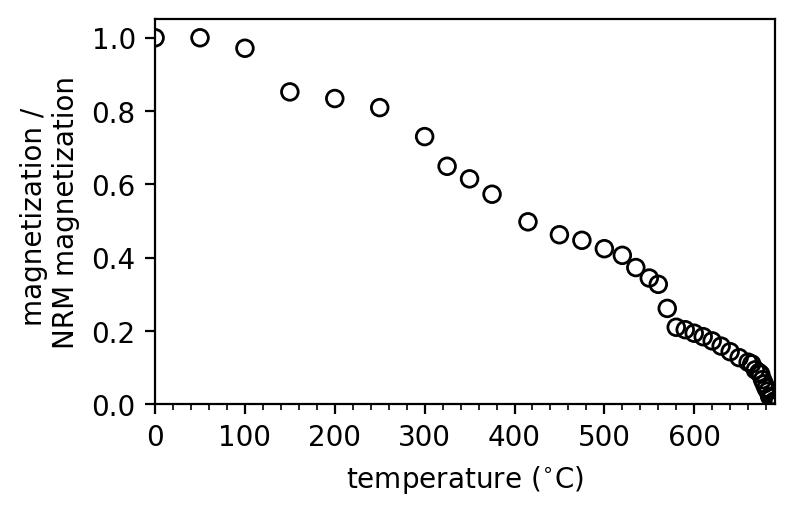

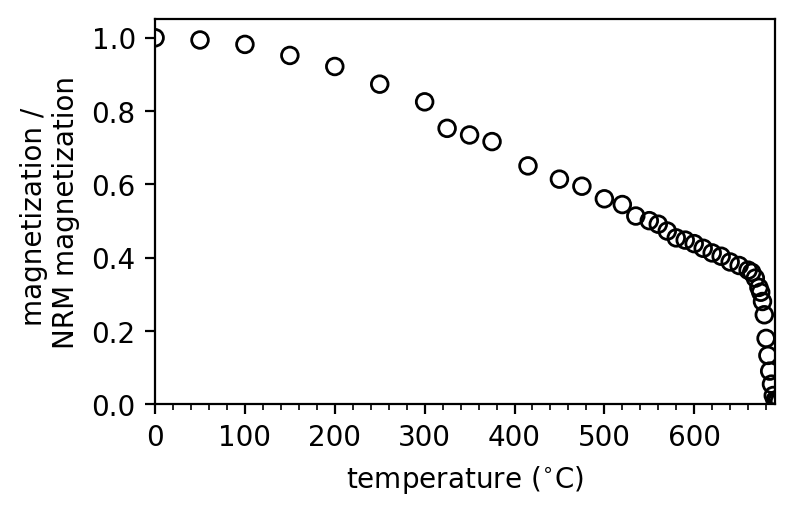

In [41]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

Nonesuch_measurements_all = pd.read_csv('../Data/pmag/Thermal_PF18/measurements.txt', sep='\t', skiprows=1)
Nonesuch_measurements = Nonesuch_measurements_all.loc[Nonesuch_measurements_all.quality == 'g']

Nonesuch_measurements_75 = Nonesuch_measurements[Nonesuch_measurements.specimen == 'PF18-75a']
Nonesuch_measurements_75.reset_index(inplace=True)

Nonesuch_measurements_76 = Nonesuch_measurements[Nonesuch_measurements.specimen == 'PF18-76a']
Nonesuch_measurements_76.reset_index(inplace=True)

plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_76.treat_temp-273,
            Nonesuch_measurements_76.magn_moment/Nonesuch_measurements_76.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_76.pdf')

plt.figure(figsize=(4,2.5))
plt.subplot(1,1,1)
plt.scatter(Nonesuch_measurements_75.treat_temp-273,
            Nonesuch_measurements_75.magn_moment/Nonesuch_measurements_75.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlabel('temperature ($^{\circ}$C)')
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlim(0,690)
plt.ylim(0,1.05)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.savefig('./code_output/demag_75.pdf')

plt.show()

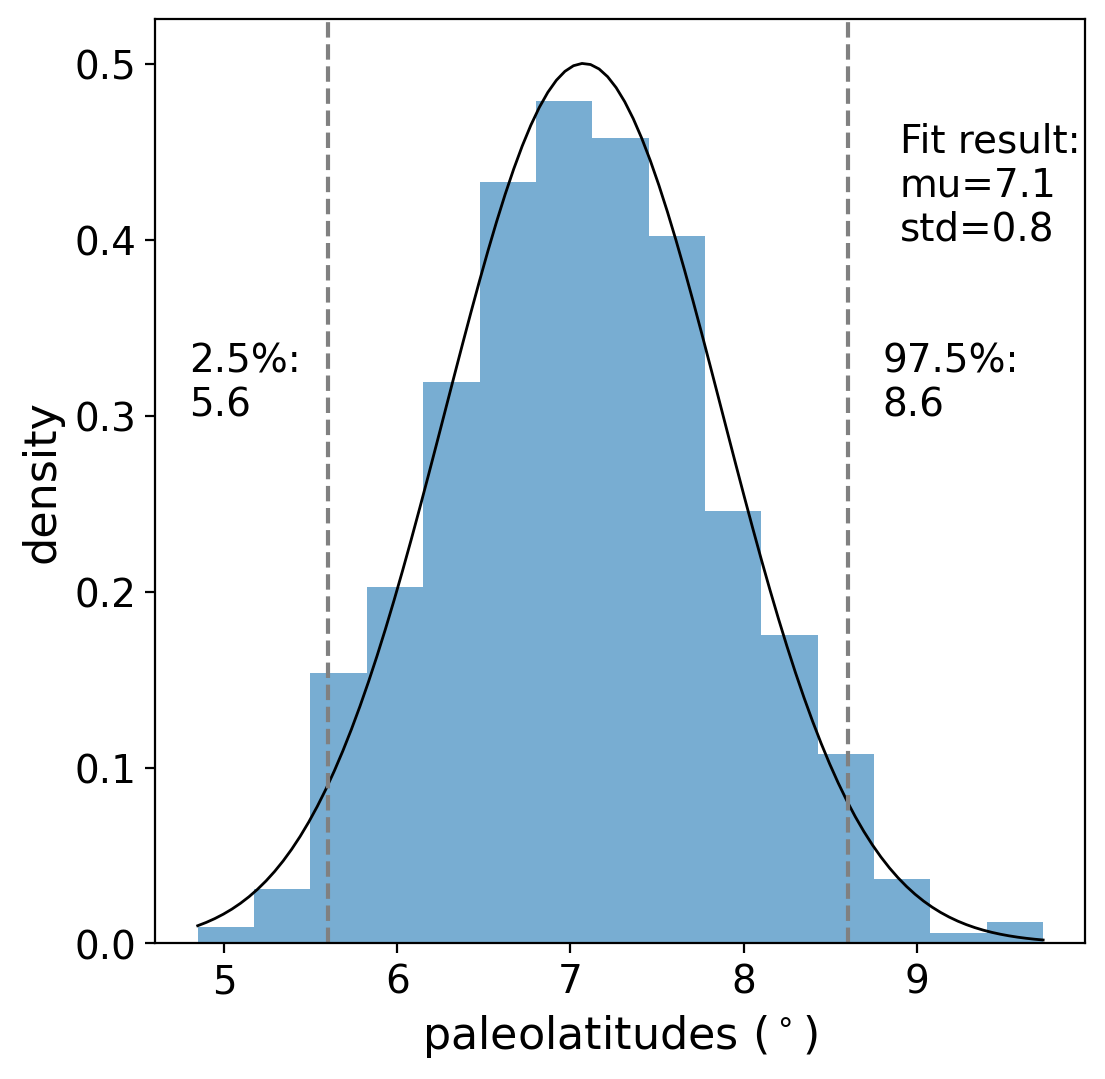

In [42]:
from scipy.stats import norm

plats = np.degrees(np.arctan(np.tan(np.radians(I))/2))
plat_lower, plat_upper = np.round(np.percentile(plats, [2.5, 97.5]), 1)
mu, std = norm.fit(plats)
x = np.linspace(min(plats), max(plats), 100)
p = norm.pdf(x, mu, std)

plt.figure(figsize=(6,6))
plt.hist(plats, bins=15, alpha=0.6, density=1)
plt.plot(x, p, 'k', linewidth=1)

plt.axvline(x=plat_lower, color = 'gray', ls='--')
plt.axvline(x=plat_upper, color = 'gray', ls='--')
plt.text(plat_lower-.8, 0.3, '2.5%:\n'+str(round(plat_lower, 1)), fontsize=14)
plt.text(plat_upper+.2, 0.3, '97.5%:\n'+str(round(plat_upper, 1)), fontsize=14)
plt.text(8.9, 0.4, 'Fit result:\n'+str('mu=')+str(round(mu,1))+str('\nstd=')+str(round(std,1)), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('paleolatitudes ($^\circ$)', fontsize=16)
plt.ylabel('density', fontsize=16)
# plt.savefig('./code_output/EI_paleolatitudes.png', dpi=300, bbox_inches='tight')
plt.show()